# Graph: PRIO2
This uses the pkl outputs from the salabim and slurmtrain notebooks

## TODO: 
- [x] Read SPRIO Files! 
- [x] Plot Priority per Job!
- [x] Import Salabim Runs
- Other
    - [ ] Add diag_start and diag_end creation to run_job_trace script
    - [ ] Automate X_batch salabim model
    - [ ] Automate X_batch slurmtrain data

In [2]:
import numpy as np
import pandas as pd
from pathlib import Path
from scipy import stats
import re
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import seaborn as sns
import datetime
%matplotlib inline

In [3]:
import matplotlib.pylab as pylab

# size: Either a relative value of 'xx-small', 'x-small', 'small', 'medium', 'large', 'x-large', 'xx-large' 
#     or an absolute font size, e.g., 10. Default: rcParams["font.size"] (default: 10.0)

params = {'legend.fontsize': 'x-large',
         'axes.labelsize': 'xx-large',
         'axes.titlesize':'xx-large',
         'xtick.labelsize':'x-large',
         'ytick.labelsize':'x-large'}
pylab.rcParams.update(params)

In [4]:
# Parameters

myrun_short_id = "2jt-run30-rho60-n500"

## Base run 
myrun_type0 = "priorun"
myrun_shortname0 = f"{myrun_type0}_{myrun_short_id}"

## Main run
myrun_type = "prio2run"
myrun_shortname = f"{myrun_type}_{myrun_short_id}"

print(f"myrun_shortname0: {myrun_shortname0}")
print(f"myrun_shortname: {myrun_shortname}")

## Load Parameters
load_strain = True
load_sala = True

## General Param
save_csv = True
clear_big_dict = False
reload_sprio_data = False

# Main Metrics for 'wait table all metrics'
metrics = ['min', 'max',  'std', 'mean']
metric_names = ['min', 'max', '$s_{dev}$', 'average']

myrun_shortname0: priorun_2jt-run30-rho60-n500
myrun_shortname: prio2run_2jt-run30-rho60-n500


In [5]:
# myrun_savepath = Path('.') / myrun_type / myrun_shortname
# print(f"Output folder: {myrun_savepath}")

In [6]:
# Paths
thesis_path = Path(".")
save_image_path = thesis_path / "images" / "results"
save_data_path = thesis_path / "images" / "data"

sprio_folderpath = "/home/overlytic/thesis/notebooks/slurm_train/output/sprio/"
sprio_path = Path(sprio_folderpath)
sprio_pkl_path = save_data_path / "sprio_prio2.pkl"

In [7]:
# Helper functions

def extract_run_num(f, run_type):
    """
    f : string filename e.g. srun8_fiforun_2jt-run30-rho60-run10_slurmtrain_dfacct
    Result : '10' on error return -1
    """
    run_search = re.search(f".*-run(.*)_{run_type}.*.pkl", f)
    
    run = -1 # default
    
    if run_search:
        srun = run_search.group(1)
        
        if srun.isdigit():
            run = int(srun)
        
    return run
    

In [8]:
# write the above as a function ... quickly ... 

## NOTE TO SELF:  hierdie kon vervang geword het met 'n eenvoudiger list comprehensions one liner ....  [Path(f"{basefilename}_{i}) for i+1 in range(n)]

def load_run_filelist(myrun_shortname, myrun_model, myrun_filename, folder_path=save_data_path, sort=True, return_detail=False):
    
    file_search_string = f'*{myrun_shortname}*{myrun_model}*{myrun_filename}'
    filelist_all = list(folder_path.glob(file_search_string))

    if filelist_all:
        # Extract run numbers
        run_nums_all = [extract_run_num(p.name, myrun_model) for p in filelist_all]
        
        if sort: 
            # Sort paths based on valid run numbers
            ind_sort = np.argsort(run_nums_all)
            ind_sort_valid = [ind_sort[i] for i, value in enumerate(run_nums_all) if value > 0]
            run_nums_sorted = [run_nums_all[i] for i in ind_sort_valid]
            filelist_sorted = [filelist_all[i] for i in ind_sort_valid]
                        
            if return_detail:
                return filelist_sorted, run_nums_sorted, file_search_string  
            else:
                return filelist_sorted
        
        else:
            if return_detail:
                return filelist_all, run_nums_all, file_search_string 
            else: 
                return filelist_all
        
    else:
        
        if return_detail:
            return [], [], file_search_string
        else: 
            return []

In [9]:
# Example for laoding runs:
strain_dfacct_sorted, strain_run_nums, strain_search_string = load_run_filelist(myrun_shortname, "slurmtrain", "dfacct.pkl", return_detail=True)

if strain_dfacct_sorted: 
    print(f"slurmtrain runs count: {len(strain_run_nums)}")
    print(f"slurmtrain run nums: {strain_run_nums}")
    for x in strain_dfacct_sorted: print(x)
else: 
    print(f"No files found for search string: {strain_search_string}\n in path: {save_data_path.absolute()}")

slurmtrain runs count: 10
slurmtrain run nums: [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]
images/data/srun8_prio2run_2jt-run30-rho60-n500-run1_slurmtrain_dfacct.pkl
images/data/srun8_prio2run_2jt-run30-rho60-n500-run2_slurmtrain_dfacct.pkl
images/data/srun8_prio2run_2jt-run30-rho60-n500-run3_slurmtrain_dfacct.pkl
images/data/srun8_prio2run_2jt-run30-rho60-n500-run4_slurmtrain_dfacct.pkl
images/data/srun8_prio2run_2jt-run30-rho60-n500-run5_slurmtrain_dfacct.pkl
images/data/srun8_prio2run_2jt-run30-rho60-n500-run6_slurmtrain_dfacct.pkl
images/data/srun8_prio2run_2jt-run30-rho60-n500-run7_slurmtrain_dfacct.pkl
images/data/srun8_prio2run_2jt-run30-rho60-n500-run8_slurmtrain_dfacct.pkl
images/data/srun8_prio2run_2jt-run30-rho60-n500-run9_slurmtrain_dfacct.pkl
images/data/srun8_prio2run_2jt-run30-rho60-n500-run10_slurmtrain_dfacct.pkl


# Load Run File List

## SlurmTrain

### Priority Runs

In [10]:
if load_strain:
    strain_prio_dfacct_sorted = load_run_filelist(myrun_shortname0, "slurmtrain", "dfacct.pkl")
    strain_prio_dfpetime_sorted = load_run_filelist(myrun_shortname0, "slurmtrain", "dfpetime.pkl")
    strain_prio_dictbackfill_sorted = load_run_filelist(myrun_shortname0, "slurmtrain", "dictbackfill.pkl")

    print(f"strain_prio_dfacct_sorted: {len(strain_prio_dfacct_sorted)}")
    print(f"strain_prio_dfpetime_sorted: {len(strain_prio_dfpetime_sorted)}")
    print(f"strain_prio_dictbackfill_sorted: {len(strain_prio_dictbackfill_sorted)}")

strain_prio_dfacct_sorted: 10
strain_prio_dfpetime_sorted: 10
strain_prio_dictbackfill_sorted: 0


In [11]:
if load_strain:
    strain_prio2_dfacct_sorted = load_run_filelist(myrun_shortname, "slurmtrain", "dfacct.pkl")
    strain_prio2_dfpetime_sorted = load_run_filelist(myrun_shortname, "slurmtrain", "dfpetime.pkl")
    strain_prio2_dictbackfill_sorted = load_run_filelist(myrun_shortname, "slurmtrain", "dictbackfill.pkl")

    print(f"strain_prio2_dfacct_sorted: {len(strain_prio2_dfacct_sorted)}")
    print(f"strain_prio2_dfpetime_sorted: {len(strain_prio2_dfpetime_sorted)}")
    print(f"strain_prio2_dictbackfill_sorted: {len(strain_prio2_dictbackfill_sorted)}")

strain_prio2_dfacct_sorted: 10
strain_prio2_dfpetime_sorted: 10
strain_prio2_dictbackfill_sorted: 0


In [12]:
# strain_prio_dfacct_sorted

## Salabim

### Prio Runs

In [13]:
if load_sala:
    sala_prio_dfjobs_sorted = load_run_filelist(myrun_shortname0, "salabim", "dfjobs.pkl")
    sala_prio_dfpetime_sorted = load_run_filelist(myrun_shortname0, "salabim", "dfpetime.pkl")

    print(f"sala_prio_dfjobs_sorted: {len(sala_prio_dfjobs_sorted)}")
    print(f"sala_prio_dfpetime_sorted: {len(sala_prio_dfpetime_sorted)}")

sala_prio_dfjobs_sorted: 10
sala_prio_dfpetime_sorted: 10


### Prio2 Runs

In [14]:
if load_sala:
    sala_prio2_dfjobs_sorted = load_run_filelist(myrun_shortname, "salabim", "dfjobs.pkl")
    sala_prio2_dfpetime_sorted = load_run_filelist(myrun_shortname, "salabim", "dfpetime.pkl")

    print(f"sala_prio2_dfjobs_sorted: {len(sala_prio2_dfjobs_sorted)}")
    print(f"sala_prio2_dfpetime_sorted: {len(sala_prio2_dfpetime_sorted)}")

sala_prio2_dfjobs_sorted: 10
sala_prio2_dfpetime_sorted: 10


## Load SPRIO Data 

In [15]:
def read_sprio_file(sprio_file_path):
    """
    read a sprio_file and return a pandas dataframe
    
    sprio_file_path: Path object
    
    Result: pandas df
    """
    
    if not sprio_file_path.exists():
        raise ValueError(f"'{sprio_file_path}' doesn't exits")
                
    filename = sprio_file_path.name
    
    # Extract date from filename
    res = re.match(r"prio-(.+)\.txt", filename)
    
    if not res: 
        raise ValueError(f"Filename ({filename}) not in the correct format e.g. 'prio-YYYY-MM-DD-HH-MM-SS.txt'")
    
    sdate = res.group(1)
    mydate = datetime.datetime.strptime(sdate, "%Y-%m-%d-%H-%M-%S")
    
    # Read in file
    try:
        df = pd.read_csv(sprio_file_path, sep="\s+")

        # Add datecolumn
        df["filename"] = sprio_file_path.name
        df["date"] = mydate

        return df
    
    except ValueError:
        return None

In [16]:
# Read in all the files

if reload_sprio_data:
    list_sprio_df = []

    sprio_paths = list(sprio_path.glob("*.txt"))

    for path in sprio_paths: 
        df = read_sprio_file(path)

        if df is not None:
            list_sprio_df.append(df)

    # Combine all sprio files
    sprio_df = pd.concat(list_sprio_df)
    sprio_df = sprio_df.sort_values(['date', 'JOBID']).reset_index(drop=True)

    del list_sprio_df
    
    sprio_df.to_pickle(sprio_pkl_path)

In [17]:
# Read sprio data from pkl file

sprio_df = pd.read_pickle(sprio_pkl_path)

display(sprio_df.head())
display(sprio_df.shape)

,JOBID,PARTITION,USER,PRIORITY,SITE,AGE,ASSOC,FAIRSHARE,JOBSIZE,PARTITION.1,QOS,NICE,TRES,filename,date
0,19200,training,user-001,5000,0,0,5000,0,0,0,0,0,NaN,prio-2023-07-27-00-07-01.txt,2023-07-27 00:07:01
1,19201,training,user-001,5000,0,0,5000,0,0,0,0,0,NaN,prio-2023-07-27-00-07-01.txt,2023-07-27 00:07:01
2,19202,training,user-001,5000,0,0,5000,0,0,0,0,0,NaN,prio-2023-07-27-00-07-01.txt,2023-07-27 00:07:01
3,19201,training,user-001,5000,0,0,5000,0,0,0,0,0,NaN,prio-2023-07-27-00-08-01.txt,2023-07-27 00:08:01
4,19202,training,user-001,5000,0,0,5000,0,0,0,0,0,NaN,prio-2023-07-27-00-08-01.txt,2023-07-27 00:08:01


(2746, 15)

In [18]:
# SPRIO Data

sprio_df_join = (sprio_df
                 .loc[:, ['JOBID', 'PRIORITY', "ASSOC", "AGE", "filename", "date"]]
                 .rename(columns = {"JOBID" : "JobID",
                                    "PRIORITY" : "sprio_priority",
                                    "ASSOC" : "sprio_prio_assoc",
                                    "AGE" : "sprio_prio_age",
                                    "filename" : "sprio_filename",
                                    "date" : "sprio_date"})
                )

print(f"SPrio row count (all data): {sprio_df_join.shape[0]}")

# Get last data row for each JobID

sprio_idx = sprio_df_join.groupby("JobID")["sprio_date"].idxmax()

sprio_df_join = sprio_df_join.iloc[sprio_idx]

print(f"SPrio row count (last row per jobid): {sprio_df_join.shape[0]}")

# Fix datatypes
sprio_df_join.JobID = sprio_df_join.JobID.astype(int)
sprio_df_join.sprio_priority = sprio_df_join.sprio_priority.astype(int)
sprio_df_join.sprio_prio_assoc = sprio_df_join.sprio_prio_assoc.astype(int)
sprio_df_join.sprio_prio_age = sprio_df_join.sprio_prio_age.astype(int)

display(sprio_df_join)

SPrio row count (all data): 2746
SPrio row count (last row per jobid): 1697


,JobID,sprio_priority,sprio_prio_assoc,sprio_prio_age,sprio_filename,sprio_date
0,19200,5000,5000,0,prio-2023-07-27-00-07-01.txt,2023-07-27 00:07:01
3,19201,5000,5000,0,prio-2023-07-27-00-08-01.txt,2023-07-27 00:08:01
4,19202,5000,5000,0,prio-2023-07-27-00-08-01.txt,2023-07-27 00:08:01
5,19204,5000,5000,0,prio-2023-07-27-00-08-01.txt,2023-07-27 00:08:01
6,19206,5000,5000,0,prio-2023-07-27-00-08-01.txt,2023-07-27 00:08:01
...,...,...,...,...,...,...
2741,26892,12583,10000,2583,prio-2023-07-28-20-59-01.txt,2023-07-28 20:59:01
2742,26893,7416,5000,2417,prio-2023-07-28-20-59-01.txt,2023-07-28 20:59:01
2743,26894,6916,5000,1917,prio-2023-07-28-20-59-01.txt,2023-07-28 20:59:01
2744,26895,10000,10000,0,prio-2023-07-28-20-59-01.txt,2023-07-28 20:59:01


# Load Runs

In [19]:
def calc_strain_wait(sacct_df):
    
    sacct_df.pe_req = sacct_df.pe_req.round(0).astype(int)
    
    wait_table = (sacct_df
     .loc[:, ['Account', 'JobName', 'pe_req', 'wait_time', 'elapsed_time']]
     .assign(job_prio =
             lambda x: np.select([x.Account == "training", x.Account=="crucial"],
                                 [1, 10]))
     .rename(columns = {'elapsed_time':'run_time',
                        'pe_req': 'job_pe_req',
                        'JobName' : 'job_number'})
     .groupby(['job_prio', 'job_pe_req'])
#       .groupby(['job_prio'])
      .agg({
           "wait_time": ["mean"],
           "run_time" : ["mean"],
           "job_number" : ["count"] #,
           # "backfill" : ["sum"]
            })
     .reset_index()
    )
    
    wait_table.columns = wait_table.columns.map("_".join).str.strip('_')
    
    return wait_table

# # # Test:
# sacct_df = pd.read_pickle(strain_dfacct_sorted[0], compression='infer')
# w_strain = calc_strain_wait(sacct_df)
# w_strain

In [20]:
def calc_sala_wait(df_jobs):
    
    df_jobs.job_pe_req = df_jobs.job_pe_req.round(0).astype(int)
    
    wait_table = (df_jobs
    #      .merge(df_job_idx, on="job_name", how="inner")
                  .loc[:, ['job_number', 'job_pe_req', 
                           'job_prio', 'wait_time', 'run_time', 
                           'backfill']]
                   .groupby(['job_prio', 'job_pe_req'])
#                   .groupby(['job_prio'])                  
                  .agg({
           "wait_time": ["mean"],
           "run_time" : ["mean"],
#            "job_pe_req" : ["mean"],
           "job_number" : ["count"],
           "backfill" : ["sum"]
            })
     .reset_index())

    wait_table.columns = wait_table.columns.map("_".join).str.strip('_')

    return(wait_table)
    
# # Test
# df_jobs = pd.read_pickle(salabim_dfjobs_sorted[0])
# w_sala = calc_sala_wait(df_jobs)
# w_sala

## SlurmTrain Runs

In [21]:
# Read SlurmTrain BF Runs and make table with wait times
if load_strain:
    strain_prio_lst_wait = []

    num_runs = len(strain_prio_dfacct_sorted)

    load_bf = False
    list_sacct = strain_prio_dfacct_sorted
    list_petime = strain_prio_dfpetime_sorted
    list_bf = None

    dic_st_prio_sacct = {}
    dic_st_prio_petime = {}
    dic_st_prio_bfdata = {}

    for i in range(num_runs):

        # SAcct
        sacct_path = list_sacct[i]
        df_sacct = pd.read_pickle(sacct_path)
        dic_st_prio_sacct[i] = df_sacct

        # PE Time
        petime_path = list_petime[i]
        df_petime = pd.read_pickle(petime_path)    
        dic_st_prio_petime[i] = df_petime

        # BF Info
        if load_bf:
            bf_path = list_bf[i]
            dic_bf = pd.read_pickle(bf_path)   # FIX THIS
            dic_st_prio_bfdata[i] = dic_bf

        # Calc Wait Time
        strain_wait = calc_strain_wait(df_sacct)        

        if load_bf: 
            strain_wait['Total_run_backfills'] = dic_bf['backfill_count']
        else: 
            strain_wait['Total_run_backfills'] = 0

        strain_wait['RunNum'] = i+1    
        strain_wait['RunType'] = 'slurmtrain'
        strain_wait['SchedType'] = 'Priority'

        strain_prio_lst_wait.append(strain_wait)

    df_wait_prio_strain = pd.concat(strain_prio_lst_wait)

    df_wait_prio_strain.head(10)

In [22]:
# Read SlurmTrain BF Runs and make table with wait times

if load_strain:
    strain_prio2_lst_wait = []

    num_runs = len(strain_prio2_dfacct_sorted)

    load_bf = False
    list_sacct = strain_prio2_dfacct_sorted
    list_petime = strain_prio2_dfpetime_sorted
    list_bf = None

    dic_st_prio2_sacct = {}
    dic_st_prio2_petime = {}
    dic_st_prio2_bfdata = {}

    for i in range(num_runs):

        # SAcct
        sacct_path = list_sacct[i]
        df_sacct = pd.read_pickle(sacct_path)
        dic_st_prio2_sacct[i] = df_sacct

        # PE Time
        petime_path = list_petime[i]
        df_petime = pd.read_pickle(petime_path)    
        dic_st_prio2_petime[i] = df_petime

        # BF Info
        if load_bf:
            bf_path = list_bf[i]
            dic_bf = pd.read_pickle(bf_path)   # FIX THIS
            dic_st_prio2_bfdata[i] = dic_bf

        # Calc Wait Time
        strain_wait = calc_strain_wait(df_sacct)        

        if load_bf: 
            strain_wait['Total_run_backfills'] = dic_bf['backfill_count']
        else: 
            strain_wait['Total_run_backfills'] = 0

        strain_wait['RunNum'] = i+1    
        strain_wait['RunType'] = 'slurmtrain'
        strain_wait['SchedType'] = 'Dynamic Priority'

        strain_prio2_lst_wait.append(strain_wait)

    df_wait_prio2_strain = pd.concat(strain_prio2_lst_wait)

    df_wait_prio2_strain.head(10)

## Salabim

In [23]:
# Read SlurmTrain FIFO Runs and make table with wait times
if load_sala:

    sala_prio_lst_wait = []

    num_runs = len(sala_prio_dfjobs_sorted)

    list_jobs = sala_prio_dfjobs_sorted
    list_petime = sala_prio_dfpetime_sorted

    dic_sala_prio_dfjobs = {}
    dic_sala_prio_petime = {}

    for i in range(num_runs):

        # SAcct
        dfjobs_path = list_jobs[i]
        df_jobs = pd.read_pickle(dfjobs_path)
        dic_sala_prio_dfjobs[i] = df_jobs

        # PE Time
        petime_path = list_petime[i]
        df_petime = pd.read_pickle(petime_path)    
        dic_sala_prio_petime[i] = df_petime

        # Calc Wait Time
        sala_wait = calc_sala_wait(df_jobs)

        sala_wait['Total_run_backfills'] = sala_wait.backfill_sum.sum()

        sala_wait['RunNum'] = i+1
        sala_wait['RunType'] = 'salabim'
        sala_wait['SchedType'] = 'Priority'


        sala_prio_lst_wait.append(sala_wait)

    df_wait_prio_sala = pd.concat(sala_prio_lst_wait)

    df_wait_prio_sala.head(10)

In [24]:
# Read SlurmTrain FIFO Runs and make table with wait times

if load_sala:

    sala_prio2_lst_wait = []

    num_runs = len(sala_prio2_dfjobs_sorted)

    list_jobs = sala_prio2_dfjobs_sorted
    list_petime = sala_prio2_dfpetime_sorted

    dic_sala_prio2_dfjobs = {}
    dic_sala_prio2_petime = {}

    for i in range(num_runs):

        # SAcct
        dfjobs_path = list_jobs[i]
        df_jobs = pd.read_pickle(dfjobs_path)
        dic_sala_prio2_dfjobs[i] = df_jobs

        # PE Time
        petime_path = list_petime[i]
        df_petime = pd.read_pickle(petime_path)
        dic_sala_prio2_petime[i] = df_petime

        # Calc Wait Time
        sala_wait = calc_sala_wait(df_jobs)

        sala_wait['Total_run_backfills'] = sala_wait.backfill_sum.sum()

        sala_wait['RunNum'] = i+1
        sala_wait['RunType'] = 'salabim'
        sala_wait['SchedType'] = 'Dynamic Priority'


        sala_prio2_lst_wait.append(sala_wait)

    df_wait_prio2_sala = pd.concat(sala_prio2_lst_wait)

    df_wait_prio2_sala.head(10)

In [25]:
# Combine data from the salabim and strain

load_runs = []

if load_strain:

    load_runs.append(df_wait_prio_strain)
    load_runs.append(df_wait_prio2_strain)

elif load_sala:

    load_runs.append(df_wait_prio_strain)
    load_runs.append(df_wait_prio2_strain)

df_wait_combo = pd.concat(load_runs)

In [26]:
df_wait_combo.loc[:, ['RunType', 'SchedType']].drop_duplicates()

,RunType,SchedType
0,slurmtrain,Priority
0,slurmtrain,Dynamic Priority


In [27]:
# CLEAR BIG Dictionary variables -> rerun if needed

loc = list(locals().keys())

if clear_big_dict:
    print(f"Clearing big dictionary variables ... ")
    count = 0
    for _var in loc:
        if re.match(pattern="^dic_(.+)", string=_var):
            print(f"  Deleting: '{_var}'")
            exec(f'del {_var}')
            count += 1

    if count == 0: print("No dictionaries variables were found to clear")
            
del loc

In [28]:
# Write csv file

if save_csv: 
    filename = f"{myrun_shortname}_data.csv"
    df_wait_combo.to_csv(thesis_path / "temp" / filename)

# Investigate PRIO2 data

In [29]:
# dic_st_prio2_sacct[0].Priority

In [30]:
# Let's have a look at salabim data

dic_sala_prio2_dfjobs[0]

,job_number,job_name,job_submit,batch_name,batch_value,job_start,job_end,job_pe_req,pe_avail,job_prio,job_prio_last,job_prio_last_age,job_prio_last_basic,slurm_comment,wait_time,run_time,backfill
0,0,1000,2020-01-01 12:00:03,03_Inter_13.0,13,2020-01-01 12:00:03,2020-01-01 12:01:13,3,8.0,5000,5000,0,5000,,0.0,70.0,0
1,1,1001,2020-01-01 12:00:15,03_Inter_13.0,13,2020-01-01 12:00:15,2020-01-01 12:00:22,3,5.0,10000,10000,0,10000,,0.0,7.0,0
2,2,1002,2020-01-01 12:00:20,03_Inter_13.0,13,2020-01-01 12:00:20,2020-01-01 12:00:28,1,2.0,5000,5000,0,5000,,0.0,8.0,0
3,3,1003,2020-01-01 12:00:28,03_Inter_13.0,13,2020-01-01 12:00:28,2020-01-01 12:00:52,3,5.0,10000,10000,0,10000,,0.0,24.0,0
4,4,1004,2020-01-01 12:00:41,03_Inter_13.0,13,2020-01-01 12:00:41,2020-01-01 12:00:47,1,2.0,10000,10000,0,10000,,0.0,6.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
495,495,1495,2020-01-01 13:58:20,03_Inter_13.0,13,2020-01-01 13:58:20,2020-01-01 13:59:27,1,8.0,10000,10000,0,10000,,0.0,67.0,0
496,496,1496,2020-01-01 13:58:21,03_Inter_13.0,13,2020-01-01 13:58:21,2020-01-01 13:58:37,1,7.0,5000,5000,0,5000,,0.0,16.0,0
497,497,1497,2020-01-01 13:58:35,03_Inter_13.0,13,2020-01-01 13:58:35,2020-01-01 13:58:53,3,6.0,10000,10000,0,10000,,0.0,18.0,0
498,498,1498,2020-01-01 13:58:41,03_Inter_13.0,13,2020-01-01 13:58:41,2020-01-01 13:58:54,1,4.0,5000,5000,0,5000,,0.0,13.0,0


## Plots

In [31]:
# Change names for plotting

df_plot = df_wait_combo.copy()

df_plot.loc[(df_plot.RunType == 'salabim'), 'RunType'] = 'SimPE'
df_plot.loc[(df_plot.RunType == 'slurmtrain'), 'RunType'] = 'SlurmTrain'

df_plot = df_plot.rename(columns = {'RunType':'Model'})

df_plot['Job PE'] = df_plot.job_pe_req.astype(str) + " PE"

## Create Job Priority column
priority_map = {
    1: 'Low',
    10: 'High'
}

df_plot['Job Priority'] = df_plot['job_prio'].map(priority_map)

# Split by Sched Type
df_plot_prio = df_plot.loc[df_plot.SchedType == 'Priority']
df_plot_prio2 = df_plot.loc[df_plot.SchedType == 'Dynamic Priority']

df_plot.head()

,job_prio,job_pe_req,wait_time_mean,run_time_mean,job_number_count,Total_run_backfills,RunNum,Model,SchedType,Job PE,Job Priority
0,1,1,3.713043,28.834783,115,0,1,SlurmTrain,Priority,1 PE,Low
1,1,3,6.304688,32.398438,128,0,1,SlurmTrain,Priority,3 PE,Low
2,10,1,1.880282,34.866197,142,0,1,SlurmTrain,Priority,1 PE,High
3,10,3,6.200000,24.313043,115,0,1,SlurmTrain,Priority,3 PE,High
0,1,1,10.028369,35.340426,141,0,2,SlurmTrain,Priority,1 PE,Low


In [32]:
# df_plot_prio2

### Wait Step Plots

In [33]:
dic_sala_prio2_dfjobs[0]

,job_number,job_name,job_submit,batch_name,batch_value,job_start,job_end,job_pe_req,pe_avail,job_prio,job_prio_last,job_prio_last_age,job_prio_last_basic,slurm_comment,wait_time,run_time,backfill
0,0,1000,2020-01-01 12:00:03,03_Inter_13.0,13,2020-01-01 12:00:03,2020-01-01 12:01:13,3,8.0,5000,5000,0,5000,,0.0,70.0,0
1,1,1001,2020-01-01 12:00:15,03_Inter_13.0,13,2020-01-01 12:00:15,2020-01-01 12:00:22,3,5.0,10000,10000,0,10000,,0.0,7.0,0
2,2,1002,2020-01-01 12:00:20,03_Inter_13.0,13,2020-01-01 12:00:20,2020-01-01 12:00:28,1,2.0,5000,5000,0,5000,,0.0,8.0,0
3,3,1003,2020-01-01 12:00:28,03_Inter_13.0,13,2020-01-01 12:00:28,2020-01-01 12:00:52,3,5.0,10000,10000,0,10000,,0.0,24.0,0
4,4,1004,2020-01-01 12:00:41,03_Inter_13.0,13,2020-01-01 12:00:41,2020-01-01 12:00:47,1,2.0,10000,10000,0,10000,,0.0,6.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
495,495,1495,2020-01-01 13:58:20,03_Inter_13.0,13,2020-01-01 13:58:20,2020-01-01 13:59:27,1,8.0,10000,10000,0,10000,,0.0,67.0,0
496,496,1496,2020-01-01 13:58:21,03_Inter_13.0,13,2020-01-01 13:58:21,2020-01-01 13:58:37,1,7.0,5000,5000,0,5000,,0.0,16.0,0
497,497,1497,2020-01-01 13:58:35,03_Inter_13.0,13,2020-01-01 13:58:35,2020-01-01 13:58:53,3,6.0,10000,10000,0,10000,,0.0,18.0,0
498,498,1498,2020-01-01 13:58:41,03_Inter_13.0,13,2020-01-01 13:58:41,2020-01-01 13:58:54,1,4.0,5000,5000,0,5000,,0.0,13.0,0


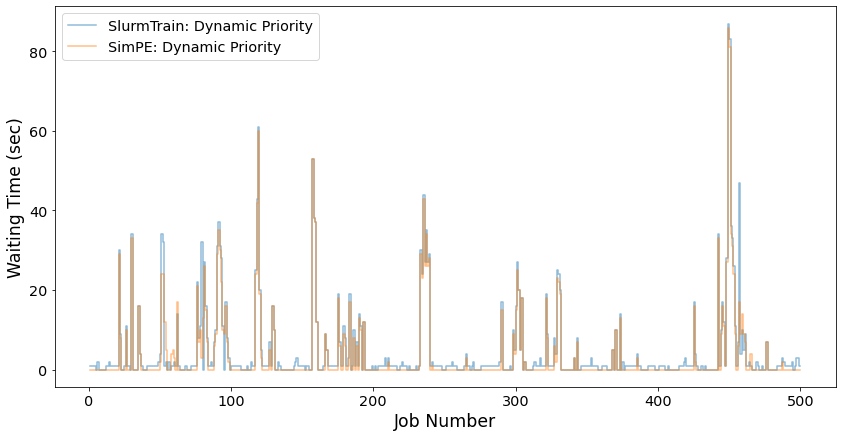

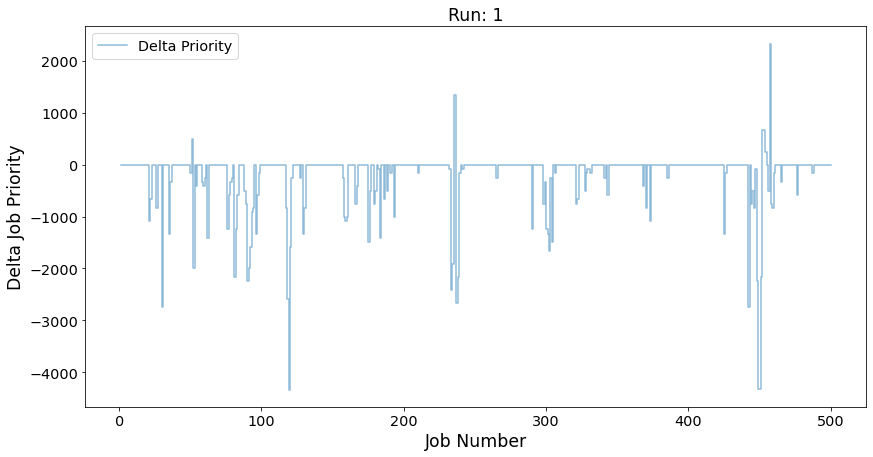

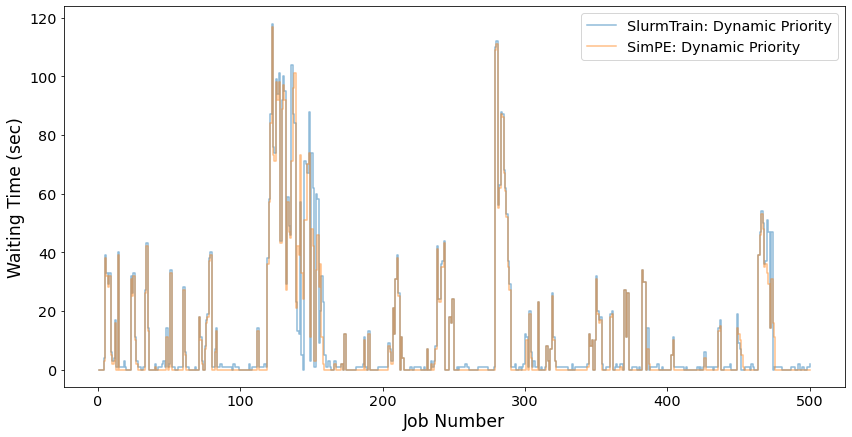

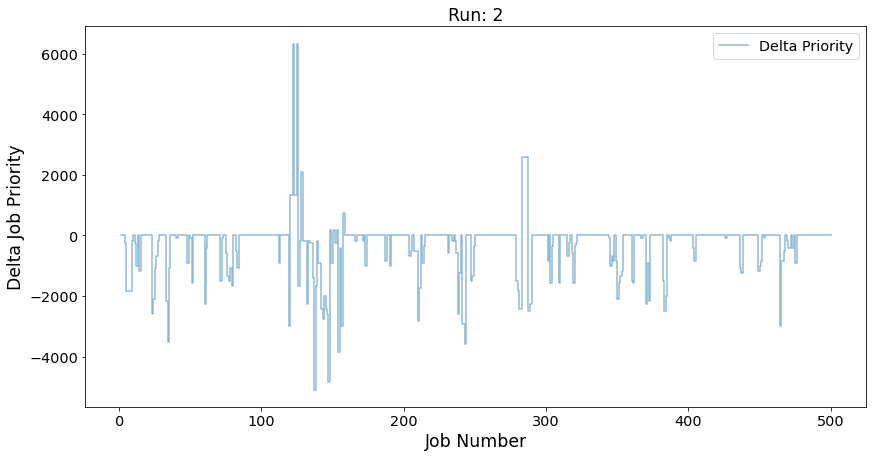

In [34]:
# n = 200

# runs=range(0,10)
save_this_plot = True

runs = [1,2]

for run in runs:
    j = run-1
    
    fig, ax = plt.subplots(figsize=[14,7])
    # ax.xaxis.set_major_formatter(mdates.DateFormatter('%H:%M'))
    
    st_acct = dic_st_prio2_sacct[j].loc[:, ['Submit', 'JobName', 'JobID', 'wait_time', 'Priority']].copy()
    st_acct = st_acct.rename(columns={'Priority' : 'PriorityStart'})
    st_acct.JobID = st_acct.JobID.astype(int)
    st_acct['job_name'] = st_acct['JobName'].astype(int)
    st_acct['RunType'] = 'slurmtrain'
    st_acct['SchedType'] = 'Dynamic Priority'

    st_acct = st_acct.merge(sprio_df_join, on="JobID", how="left") ## Add SPrio Information
    st_acct['job_prio_st'] = np.where(st_acct.sprio_priority.isna(), st_acct.PriorityStart, st_acct.sprio_priority)  # Combine two Priority
    st_acct['job_prio_st'] = st_acct['job_prio_st'].astype(int)

    sala_jobs = dic_sala_prio2_dfjobs[j].loc[:, ['job_name',                                          
                                                 'job_prio', 
                                                 'job_prio_last',
                                                 'job_prio_last_age',
                                                 'job_prio_last_basic',
                                                 'wait_time',]].copy()

    sala_jobs = sala_jobs.rename(columns={'job_prio' : 'job_prio_start_sala',
                                           'job_prio_last' : 'job_prio_sala',
                                           'job_prio_last_age' : 'job_prio_age_sala',
                                           'job_prio_last_basic' : 'job_prio_basic_sala'})

    sala_jobs['job_name'] = sala_jobs['job_name'].astype(int)
    sala_jobs['RunType'] = 'salabim'
    sala_jobs['SchedType'] = 'Priority'

    compare_wait = pd.merge(left=sala_jobs, 
                            right=st_acct, 
                            how="inner",
                            on="job_name",
                            suffixes = ("_sala", "_st")
                            )

    compare_wait['Job Number'] = compare_wait.job_name - 1000 + 1


    # Plot
    ax.step(compare_wait['Job Number'], 
        compare_wait.wait_time_st,
        where='post',
        label = f"SlurmTrain: Dynamic Priority",
        alpha=.5)

    # Plot 
    ax.step(compare_wait['Job Number'], 
        compare_wait.wait_time_sala,
        where='post',
        label = f"SimPE: Dynamic Priority",
        alpha=.5)

    ax.legend()
    ax.set_xlabel('Job Number')
    # ax.set_ylabel(r'PE Available / Max PE')
    ax.set_ylabel('Waiting Time (sec)')

    myrun_models = f"{myrun_type}_wait_step_plot_run{run}"
    pltpath = f'{save_image_path}/{myrun_shortname}_{myrun_models}.png'

    if save_this_plot:
        plt.savefig(pltpath, facecolor='w', transparent=False)

    plt.show()

    # Second Plot

    fig, ax = plt.subplots(figsize=[14,7])

    # ax.step(compare_wait['Job Number'], 
    #     compare_wait.job_prio_st.astype(int),
    #     where='post',
    #     label = f"SlurmTrain: Dynamic Priority",
    #     alpha=.5)

    # ax.step(compare_wait['Job Number'], 
    #     compare_wait.job_prio_sala.astype(int),
    #     where='post',
    #     label = f"SimPE: Dynamic Priority",
    #     alpha=.5)

    ax.step(compare_wait['Job Number'], 
        compare_wait.job_prio_st - compare_wait.job_prio_sala,
        where='post',
        label = f"Delta Priority",
        alpha=.5)

    ax.legend()
    ax.set_xlabel('Job Number')
    # ax.set_ylabel(r'PE Available / Max PE')
    ax.set_ylabel('Delta Job Priority')

    plt.title(f"Run: {j+1}")
    plt.show()

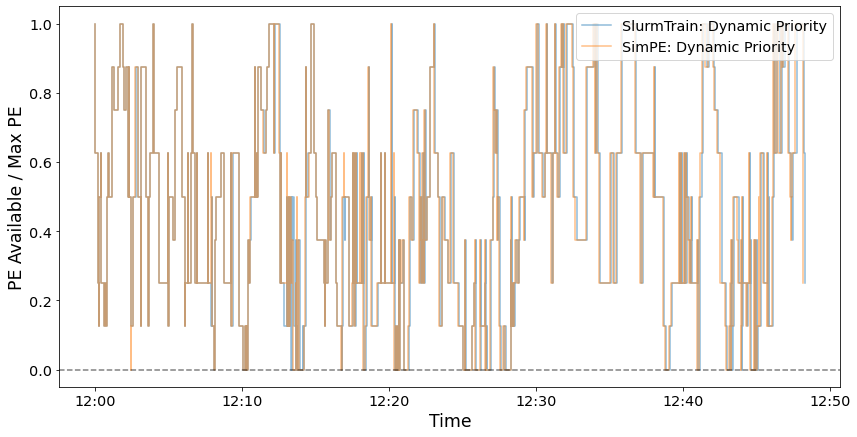

In [35]:
n = 200
# ax.xaxis.set_major_formatter(mdates.DateFormatter('%H:%M'))

# runs=range(0,10)
# save_this_plot = True

save_this_plot = True

run = 1
j = run-1

# Separate plot ... to show negative PE....petime plots ... 

petime_1 = dic_st_prio2_petime[j].loc[0:2*n, :].copy()
# st_acct['job_name'] = st_acct['JobName'].astype(int)
# petime_1['event_time'] = petime_1.event_time - petime_1.event_time.values[0]
petime_1['RunType'] = 'slurmtrain'
petime_1['SchedType'] = 'Dynamic Priority'
petime_1_label = 'SlurmTrain: Dynamic Priority'


petime_2 = dic_sala_prio2_petime[j].loc[0:2*n, :].copy()
# petime_2['event_time'] = petime_2.event_time - petime_2.event_time.values[0]
# sala_jobs['job_name'] = sala_jobs['job_name'].astype(int)
petime_2['RunType'] = 'salabim'
petime_2['SchedType'] = 'Dynamic Priority'
petime_2_label = 'SimPE: Dynamic Priority'


# Plot graph

fig, ax = plt.subplots(figsize=[14,7])

# for ax in axs.flat:
# #     ax.xaxis.set_minor_locator(mdates.AutoDateLocator(interval_multiples=True))
#     ax.xaxis.set_major_locator(mdates.AutoDateLocator(minticks=3, maxticks=4))
# #     ax.xaxis.set_minor_locator(mdates.HourLocator(byhour=range(11,19,1))) # Finetune! Or make more auto!
# #     ax.xaxis.set_major_locator(mdates.HourLocator(byhour=range(9,19,3))) # Finetune! Or make more auto!
#     ax.xaxis.set_major_formatter(mdates.DateFormatter('%y-%m-%d %H:%M'))

# ax.xaxis.set_major_locator(mdates.AutoDateLocator(minticks=3, maxticks=5))
# ax.xaxis.set_major_formatter(mdates.DateFormatter('%y-%m-%d %H:%M'))
ax.xaxis.set_major_formatter(mdates.DateFormatter('%H:%M'))

## Plot 1

# ax = axs[0,0]

ax.step(petime_1.event_time, 
        petime_1.pe_avail_norm,
        where='post',  # Baie NB!
        label = petime_1_label,
        alpha=0.5)

ax.step(petime_2.event_time, 
        petime_2.pe_avail_norm,
        where='post',  # Baie NB!
        label = petime_2_label,
        alpha=0.5)

# Add a line at 0.0
plt.axhline(y=0, color='k', linestyle='dashed', alpha = 0.5)

ax.legend(loc="upper right")
ax.set_xlabel('Time')
ax.set_ylabel(r'PE Available / Max PE')

# Add save this plot stuff!!! 

### TODO!!!

plt.show()

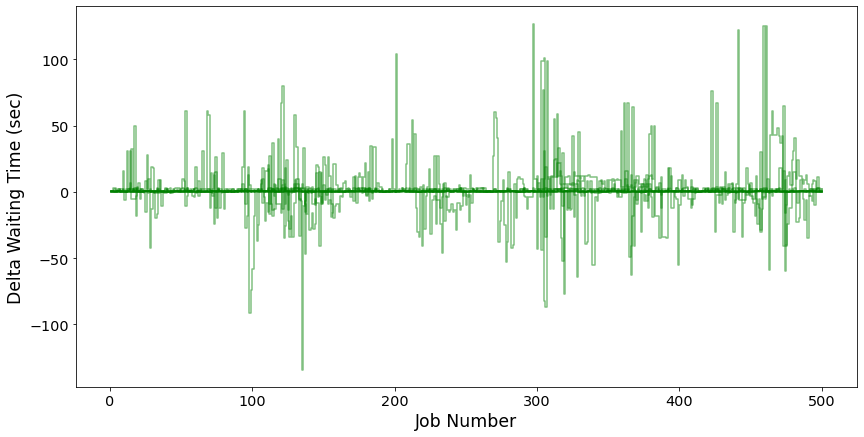

In [36]:
fig, ax = plt.subplots(figsize=[14,7])
# ax.xaxis.set_major_formatter(mdates.DateFormatter('%H:%M'))

runs=range(0,10)

for j in runs:
    st_acct = dic_st_prio2_sacct[j].loc[:, ['JobName', 'wait_time']].copy()
    st_acct['job_name'] = st_acct['JobName'].astype(int)
    st_acct['RunType'] = 'slurmtrain'
    st_acct['SchedType'] = 'Priority'

    sala_jobs = dic_sala_prio2_dfjobs[j].loc[:, ['job_name', 'wait_time']].copy()
    sala_jobs['job_name'] = sala_jobs['job_name'].astype(int)
    sala_jobs['RunType'] = 'salabim'
    sala_jobs['SchedType'] = 'Priority'

    compare_wait = pd.merge(left=sala_jobs, 
                            right=st_acct, 
                            how="inner",
                            on="job_name",
                            suffixes = ("_sala", "_st")
                            )
    
    compare_wait['Job Number'] = compare_wait.job_name - 1000 + 1

    
    # Plot
    ax.step(compare_wait['Job Number'], 
        compare_wait.wait_time_st - compare_wait.wait_time_sala,
        where='post',
        label = f"Jitter: SlurmTrain - SimPE",
        c='g',
        alpha=.5,
        )
    
# ax.legend()
ax.set_xlabel('Job Number')
# ax.set_ylabel(r'PE Available / Max PE')
ax.set_ylabel('Delta Waiting Time (sec)')

myrun_models = f"{myrun_type}_wait_jitter_plot"
pltpath = f'{save_image_path}/{myrun_shortname}_{myrun_models}.png'

plt.savefig(pltpath, facecolor='w', transparent=False)

plt.show()

In [37]:
# Get the dynamic priority value from the salabim run ... 

### Wait Time Plots (prio vs prio2)

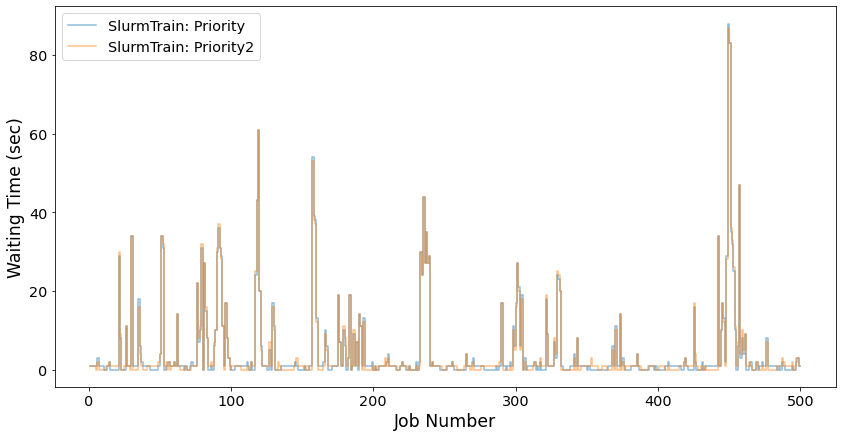

In [38]:
# n = 200

# runs=range(0,10)
save_this_plot = False

runs = [1]

for run in runs:
    j = run-1
    fig, ax = plt.subplots(figsize=[14,7])
    # ax.xaxis.set_major_formatter(mdates.DateFormatter('%H:%M'))

    st_acct = dic_st_prio_sacct[j].loc[:, ['JobName', 'wait_time']].copy()
    st_acct['job_name'] = st_acct['JobName'].astype(int)
    st_acct['RunType'] = 'slurmtrain'
    st_acct['SchedType'] = 'Priority'

    st_acct2 = dic_st_prio2_sacct[j].loc[:, ['JobName', 'wait_time']].copy()
    st_acct2['job_name'] = st_acct2['JobName'].astype(int)
    st_acct2['RunType'] = 'slurmtrain'
    st_acct2['SchedType'] = 'Priority'

    compare_wait = pd.merge(left=st_acct2, 
                            right=st_acct, 
                            how="inner",
                            on="job_name",
                            suffixes = ("_prio2", "_prio")
                            )

    compare_wait['Job Number'] = compare_wait.job_name - 1000 + 1


    # Plot
    ax.step(compare_wait['Job Number'], 
        compare_wait.wait_time_prio,
        where='post',
        label = f"SlurmTrain: Priority",
        alpha=.5)

    # Plot 
    ax.step(compare_wait['Job Number'], 
        compare_wait.wait_time_prio2,
        where='post',
        label = f"SlurmTrain: Priority2",
        alpha=.5)

    ax.legend()
    ax.set_xlabel('Job Number')
    # ax.set_ylabel(r'PE Available / Max PE')
    ax.set_ylabel('Waiting Time (sec)')

    myrun_models = f"{myrun_type}_wait_step_plot_run{run}"
    pltpath = f'{save_image_path}/{myrun_shortname}_{myrun_models}.png'

    if save_this_plot:
        plt.savefig(pltpath, facecolor='w', transparent=False)

    plt.show()

In [39]:
j = 0 

# PRIO
st_acct = dic_st_prio_sacct[j].loc[:, ['JobName', 'wait_time', 'Priority']].copy()
st_acct['job_name'] = st_acct['JobName'].astype(int)
st_acct['RunType'] = 'slurmtrain'
st_acct['SchedType'] = 'Priority'

# PRIO2
st_acct2 = dic_st_prio2_sacct[j].loc[:, ['Submit', 'JobName', 'JobID', 'wait_time', 'Priority']].copy()
st_acct2 = st_acct2.rename(columns={'Priority' : 'PriorityStart'})
st_acct2.JobID = st_acct2.JobID.astype(int)
st_acct2['job_name'] = st_acct2['JobName'].astype(int)
st_acct2['RunType'] = 'slurmtrain'
st_acct2['SchedType'] = 'Priority'

## Add SPrio Information
st_acct2 = st_acct2.merge(sprio_df_join, on="JobID", how="left")

# Combine two Priority
st_acct2['Priority'] = np.where(st_acct2.sprio_priority.isna(), st_acct2.PriorityStart, st_acct2.sprio_priority)

# st_acct2.loc[st_acct2.sprio_priority.isna()]

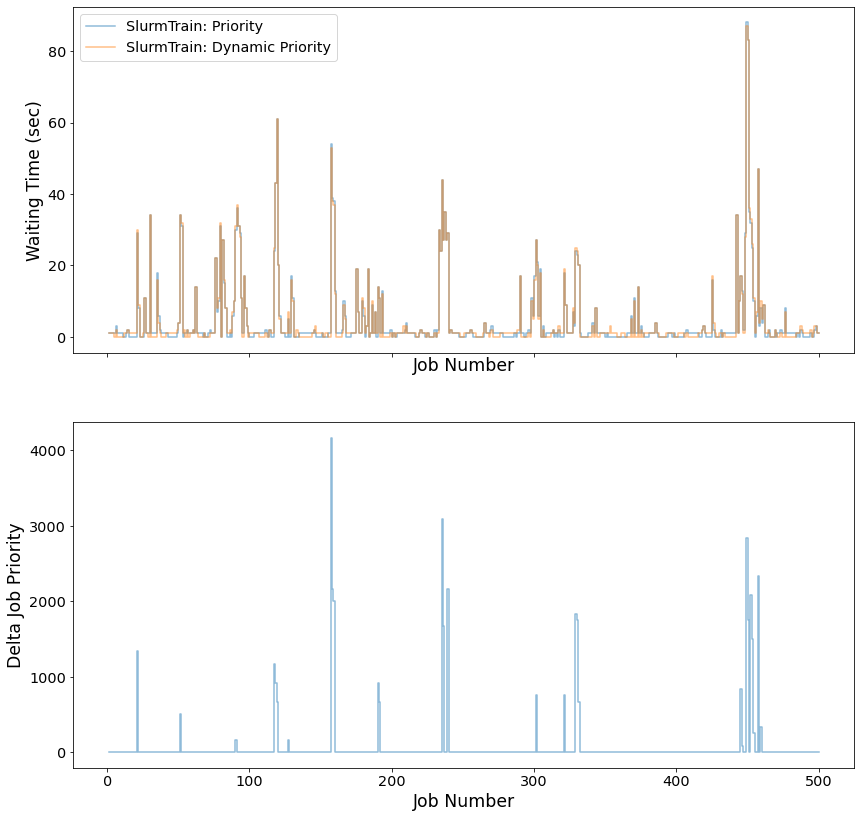

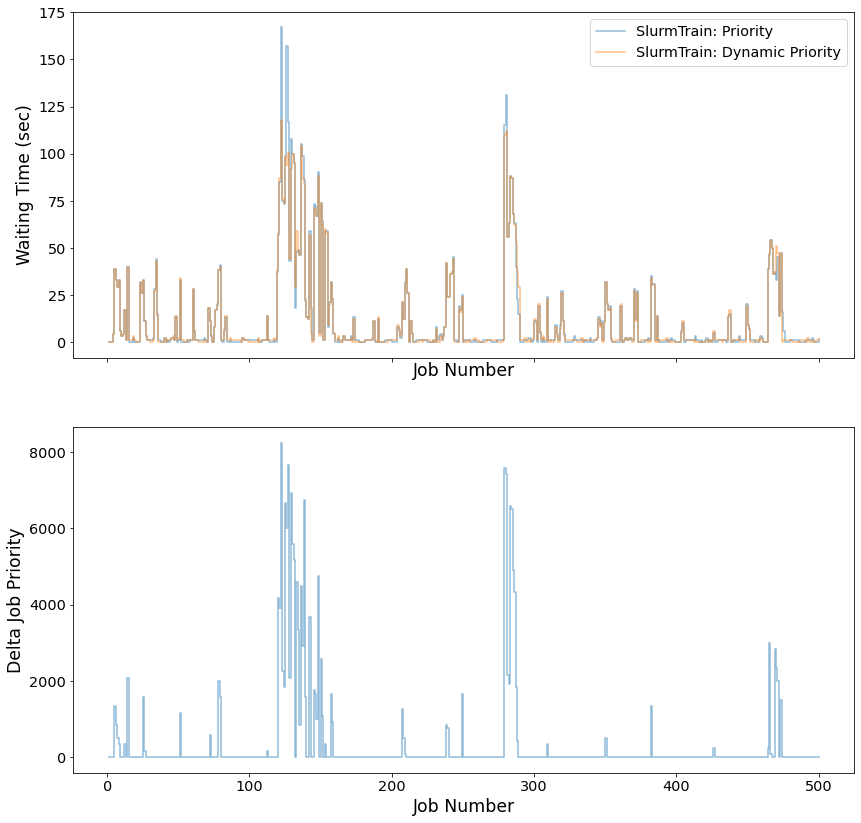

In [40]:
save_this_plot = True

runs = [1,2]
# runs_idx = [1]

for run in runs:
    
    j = run - 1
    # ax.xaxis.set_major_formatter(mdates.DateFormatter('%H:%M'))

    # runs=range(0,10)
    save_this_plot = True

    #     run = 5
    #     j = run-1
    st_acct = dic_st_prio_sacct[j].loc[:, ['JobName', 'wait_time', 'Priority']].copy()
    st_acct.Priority = st_acct.Priority.astype(int)
    st_acct['job_name'] = st_acct['JobName'].astype(int)
    st_acct['RunType'] = 'slurmtrain'
    st_acct['SchedType'] = 'Priority'

    # PRIO2
    st_acct2 = dic_st_prio2_sacct[j].loc[:, ['Submit', 'JobName', 'JobID', 'wait_time', 'Priority']].copy()
    st_acct2 = st_acct2.rename(columns={'Priority' : 'PriorityStart'})
    st_acct2.JobID = st_acct2.JobID.astype(int)
    st_acct2.PriorityStart = st_acct2.PriorityStart.astype(int)
    st_acct2['job_name'] = st_acct2.JobName.astype(int)
    st_acct2['RunType'] = 'slurmtrain'
    st_acct2['SchedType'] = 'Priority'

    ## Add SPrio Information
    st_acct2 = st_acct2.merge(sprio_df_join, on="JobID", how="left")

    # Combine two Priority
    st_acct2['Priority'] = np.where(st_acct2.sprio_priority.isna(), st_acct2.PriorityStart, st_acct2.sprio_priority)
    
    # Compare Waiting times
    compare_wait = pd.merge(left=st_acct2, 
                            right=st_acct, 
                            how="inner",
                            on="job_name",
                            suffixes = ("_prio2", "_prio")
                            )

    compare_wait['Job Number'] = compare_wait.job_name - 1000 + 1

    
    fig, axs = plt.subplots(nrows=2, figsize=[14,14], sharex = True)

    # Plot 1
    
    ax = axs[0]
    
    # Plot
    ax.step(compare_wait['Job Number'], 
        compare_wait.wait_time_prio,
        where='post',
        label = f"SlurmTrain: Priority",
        alpha=.5)

    # Plot 
    ax.step(compare_wait['Job Number'], 
        compare_wait.wait_time_prio2,
        where='post',
        label = f"SlurmTrain: Dynamic Priority",
        alpha=.5)

    ax.legend()
    ax.set_xlabel('Job Number')
    # ax.set_ylabel(r'PE Available / Max PE')
    ax.set_ylabel('Waiting Time (sec)')

    #     if save_this_plot:
    #         plt.savefig(pltpath, facecolor='w', transparent=False)

    # Plot 2
    ax = axs[1]

#     # Plot
#     ax.step(compare_wait['Job Number'], 
#         compare_wait.Priority_prio.astype(int),
#         where='post',
#         label = f"SlurmTrain: Priority",
#         alpha=.5)

#     # Plot 
#     ax.step(compare_wait['Job Number'], 
#         compare_wait.Priority_prio2.astype(int),
#         where='post',
#         label = f"SlurmTrain: Priority2",
#         alpha=.5)
    
    ax.step(compare_wait['Job Number'], 
        compare_wait.Priority_prio2 - compare_wait.Priority_prio,
        where='post',
        label = f"Delta Priority in Prio2 Run",
        alpha=.5)

#     ax.legend()
    ax.set_xlabel('Job Number')
    # ax.set_ylabel(r'PE Available / Max PE')
    ax.set_ylabel('Delta Job Priority')

    if save_this_plot:
        myrun_models = f"{myrun_type}_slurmtrain_wait_step_plot_run{run}"
        pltpath = f'{save_image_path}/{myrun_shortname}_{myrun_models}.png'
        plt.savefig(pltpath, facecolor='w', transparent=False)
    
#     plt.title(f"Run: {j+1}")
    plt.show()

In [41]:
# dic_sala_prio_dfjobs[0]

In [42]:
# dic_sala_prio_dfjobs[0]
compare_wait

,Submit,JobName_prio2,JobID,wait_time_prio2,PriorityStart,job_name,RunType_prio2,SchedType_prio2,sprio_priority,sprio_prio_assoc,sprio_prio_age,sprio_filename,sprio_date,Priority_prio2,JobName_prio,wait_time_prio,Priority_prio,RunType_prio,SchedType_prio,Job Number
0,2023-07-27T16:04:11,1000,22411,0.0,5000,1000,slurmtrain,Priority,NaN,NaN,NaN,NaN,NaT,5000.0,1000,0.0,5000,slurmtrain,Priority,1
1,2023-07-27T16:04:16,1001,22412,0.0,5000,1001,slurmtrain,Priority,NaN,NaN,NaN,NaN,NaT,5000.0,1001,0.0,5000,slurmtrain,Priority,2
2,2023-07-27T16:04:28,1002,22413,0.0,5000,1002,slurmtrain,Priority,NaN,NaN,NaN,NaN,NaT,5000.0,1002,0.0,5000,slurmtrain,Priority,3
3,2023-07-27T16:04:35,1003,22414,4.0,5000,1003,slurmtrain,Priority,NaN,NaN,NaN,NaN,NaT,5000.0,1003,4.0,5000,slurmtrain,Priority,4
4,2023-07-27T16:04:43,1004,22415,39.0,10000,1004,slurmtrain,Priority,11333.0,10000.0,1333.0,prio-2023-07-27-16-05-01.txt,2023-07-27 16:05:01,11333.0,1004,39.0,10000,slurmtrain,Priority,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
495,2023-07-27T18:00:22,1495,22906,0.0,10000,1495,slurmtrain,Priority,NaN,NaN,NaN,NaN,NaT,10000.0,1495,1.0,10000,slurmtrain,Priority,496
496,2023-07-27T18:01:11,1496,22907,0.0,5000,1496,slurmtrain,Priority,NaN,NaN,NaN,NaN,NaT,5000.0,1496,0.0,5000,slurmtrain,Priority,497
497,2023-07-27T18:02:08,1497,22908,1.0,10000,1497,slurmtrain,Priority,NaN,NaN,NaN,NaN,NaT,10000.0,1497,0.0,10000,slurmtrain,Priority,498
498,2023-07-27T18:02:13,1498,22909,1.0,10000,1498,slurmtrain,Priority,NaN,NaN,NaN,NaN,NaT,10000.0,1498,0.0,10000,slurmtrain,Priority,499


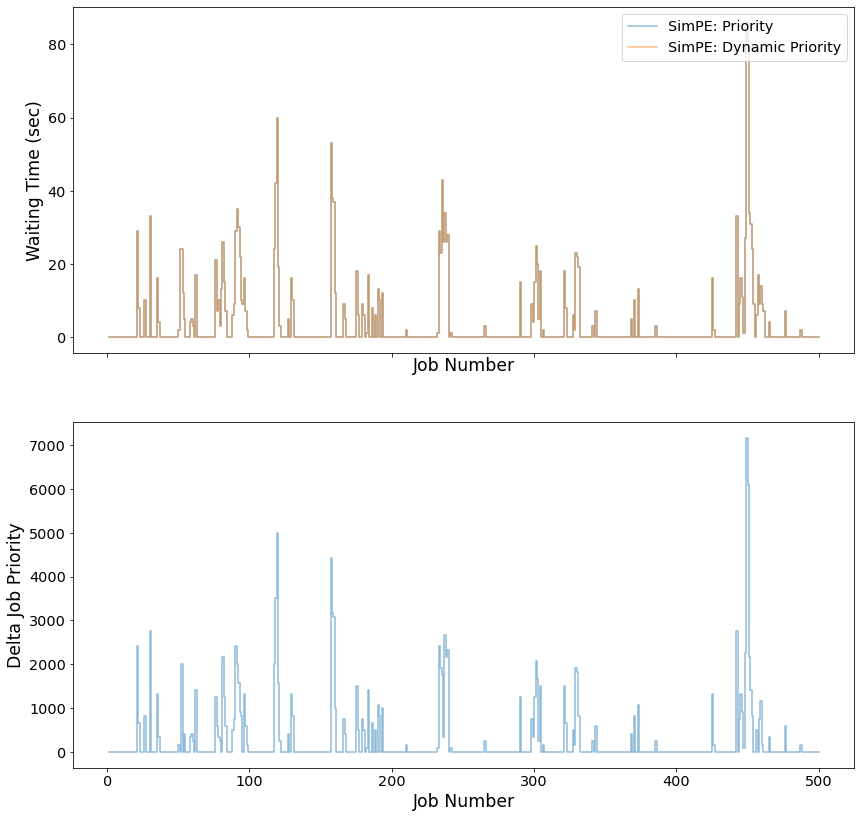

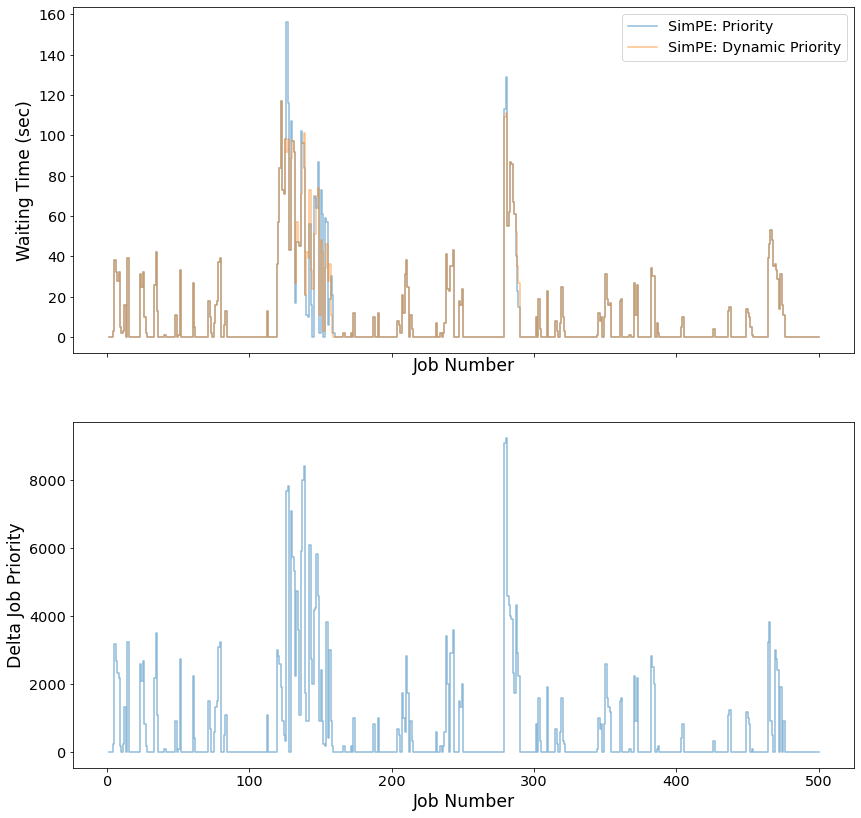

In [43]:
# n = 200

# runs=range(0,10)
save_this_plot = True

runs = [1,2]

for run in runs:
    j = run-1
    
    # ax.xaxis.set_major_formatter(mdates.DateFormatter('%H:%M'))

    # prio
    sala_jobs = dic_sala_prio_dfjobs[j].loc[:, ['job_name',                                          
                                                 'job_prio',                                     
                                                 'wait_time']].copy()
    
    sala_jobs['job_prio'] = np.select([sala_jobs.job_prio == 1, sala_jobs.job_prio==10], [5000, 10000])
    sala_jobs['job_prio_last'] = sala_jobs['job_prio']
    
    sala_jobs = sala_jobs.rename(columns={'job_prio' : 'job_prio_start',
                                          'job_prio_last' : 'job_prio'})
 
    sala_jobs['job_name'] = sala_jobs['job_name'].astype(int)
    sala_jobs['RunType'] = 'salabim'
    sala_jobs['SchedType'] = 'Priority'
    
    # prio 2
    sala_jobs2 = dic_sala_prio2_dfjobs[j].loc[:, ['job_name',                                          
                                                 'job_prio', 
                                                 'job_prio_last',
                                                 'job_prio_last_age',
                                                 'job_prio_last_basic',
                                                 'wait_time']].copy()

    sala_jobs2 = sala_jobs2.rename(columns={'job_prio' : 'job_prio_start',
                                           'job_prio_last' : 'job_prio',
                                           'job_prio_last_age' : 'job_prio_age',
                                           'job_prio_last_basic' : 'job_prio_basic'})

    sala_jobs2['job_name'] = sala_jobs2['job_name'].astype(int)
    sala_jobs2['RunType'] = 'salabim'
    sala_jobs2['SchedType'] = 'Priority2'

    compare_wait = pd.merge(left=sala_jobs, 
                            right=sala_jobs2, 
                            how="inner",
                            on="job_name",
                            suffixes = ("_prio", "_prio2")
                            )

    compare_wait['Job Number'] = compare_wait.job_name - 1000 + 1

    fig, axs = plt.subplots(nrows=2, figsize=[14,14], sharex = True)

    # Plot 1
    ax = axs[0]
    
    ax.step(compare_wait['Job Number'], 
        compare_wait.wait_time_prio,
        where='post',
        label = f"SimPE: Priority",
        alpha=.5)

    # Plot 
    ax.step(compare_wait['Job Number'], 
        compare_wait.wait_time_prio2,
        where='post',
        label = f"SimPE: Dynamic Priority",
        alpha=.5)

    ax.legend(loc = 'upper right')
    ax.set_xlabel('Job Number')
    # ax.set_ylabel(r'PE Available / Max PE')
    ax.set_ylabel('Waiting Time (sec)')

    # Plot 2

    ax = axs[1]

    # ax.step(compare_wait['Job Number'], 
    #     compare_wait.job_prio_st.astype(int),
    #     where='post',
    #     label = f"SlurmTrain: Dynamic Priority",
    #     alpha=.5)

    # ax.step(compare_wait['Job Number'], 
    #     compare_wait.job_prio_sala.astype(int),
    #     where='post',
    #     label = f"SimPE: Dynamic Priority",
    #     alpha=.5)

    ax.step(compare_wait['Job Number'], 
        compare_wait.job_prio_prio2 - compare_wait.job_prio_prio,
        where='post',
#         label = r"${Priority}^{(pri2)}-{Priority}^{(pri)}$",
        alpha=.5)

#     ax.legend(loc='upper left')
    ax.set_xlabel('Job Number')
    # ax.set_ylabel(r'PE Available / Max PE')
    ax.set_ylabel('Delta Job Priority')
#     ax.set_ylabel(r"${Priority}^{(pri2)}-{Priority}^{(pri)}$")

#     plt.title(f"Run: {j+1}")
#     plt.show()

    if save_this_plot:
        myrun_models = f"{myrun_type}_simpe_wait_step_plot_run{run}"
        pltpath = f'{save_image_path}/{myrun_shortname}_{myrun_models}.png'
        plt.savefig(pltpath, facecolor='w', transparent=False)

    plt.show()

In [44]:
# RUN 6: Does not look good! FIXED IT.


In [45]:
# # Check PRIO2 JOBS

# display(compare_wait.query("PriorityStart > Priority_prio")) # Prio2 start vs Prio Start
# display(compare_wait.query("wait_time_prio2 > 60").reset_index(drop=True)) #.sort_values('wait_time_prio2'))

In [46]:
# # now lets see if we can get the priorities next to it!

# j = 

# fig, ax = plt.subplots(figsize=[14,7])

# list(dic_st_prio_sacct[j].columns)
# dic_st_prio_sacct[j].loc[:, ['JobName','Priority']]

# list(dic_st_prio2_sacct[1].columns)
# dic_st_prio2_sacct[j].loc[:, ['JobName','Priority']]

# ax.step(compare_wait['Job Number'], 
#     compare_wait.Priority_prio2.astype(int) - compare_wait.Priority_prio.astype(int),
#     where='post',
#     label = f"Extra Job Priority in Prio2 Run",
#     alpha=.5)

# # ax.step(compare_wait['Job Number'], 
# #     compare_wait.Priority_prio2,
# #     where='post',
# #     label = f"SlurmTrain: Priority",
# #     alpha=.5)

# ax.legend()
# ax.set_xlabel('Job Number')
# # ax.set_ylabel(r'PE Available / Max PE')
# ax.set_ylabel('Waiting Time (sec)')

# plt.show()

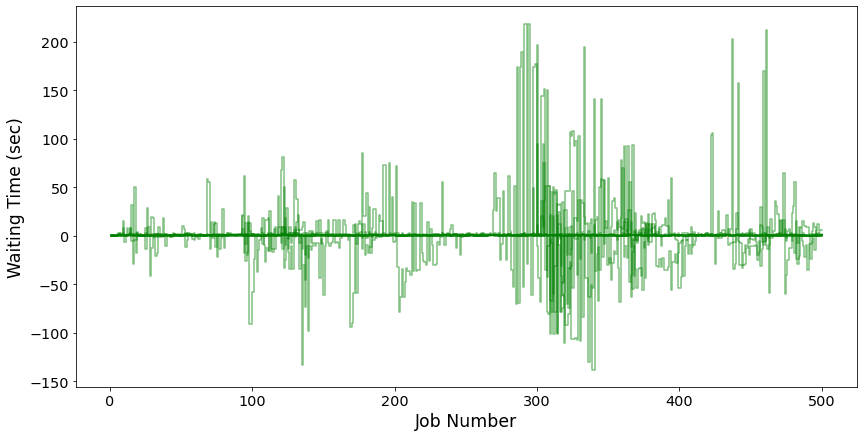

In [47]:
fig, ax = plt.subplots(figsize=[14,7])
# ax.xaxis.set_major_formatter(mdates.DateFormatter('%H:%M'))

runs=range(0,10)

for j in runs:
    st_acct = dic_st_prio_sacct[j].loc[:, ['JobName', 'wait_time']].copy()
    st_acct['job_name'] = st_acct['JobName'].astype(int)
    st_acct['RunType'] = 'slurmtrain'
    st_acct['SchedType'] = 'Priority'

    sala_jobs = dic_sala_prio_dfjobs[j].loc[:, ['job_name', 'wait_time']].copy()
    sala_jobs['job_name'] = sala_jobs['job_name'].astype(int)
    sala_jobs['RunType'] = 'salabim'
    sala_jobs['SchedType'] = 'Priority'

    compare_wait = pd.merge(left=sala_jobs, 
                            right=st_acct, 
                            how="inner",
                            on="job_name",
                            suffixes = ("_sala", "_st")
                            )
    
    compare_wait['Job Number'] = compare_wait.job_name - 1000 + 1

    
    # Plot
    ax.step(compare_wait['Job Number'], 
        compare_wait.wait_time_st - compare_wait.wait_time_sala,
        where='post',
        label = f"Jitter: SlurmTrain - SimPE",
        c='g',
        alpha=.5,
        )
    
# ax.legend()
ax.set_xlabel('Job Number')
# ax.set_ylabel(r'PE Available / Max PE')
ax.set_ylabel('Waiting Time (sec)')

myrun_models = f"{myrun_type}_wait_jitter_plot"
pltpath = f'{save_image_path}/{myrun_shortname}_{myrun_models}.png'

plt.savefig(pltpath, facecolor='w', transparent=False)



plt.show()

### Jitter Wait Delta: histogram

In [48]:
runs=range(0,10)

list_compare_wait = []

for j in runs:
    st_acct = dic_st_prio_sacct[j].loc[:, ['JobName', 'wait_time', 'Priority']].copy()
    st_acct['job_name'] = st_acct['JobName'].astype(int)
    st_acct['RunType'] = 'slurmtrain'
    st_acct['SchedType'] = 'Priority'

    st_acct2 = dic_st_prio2_sacct[j].loc[:, ['Submit', 'JobName', 'wait_time', 'Priority']].copy()
    st_acct2['job_name'] = st_acct2['JobName'].astype(int)
    st_acct2['RunType'] = 'slurmtrain'
    st_acct2['SchedType'] = 'Priority'

    compare_wait = pd.merge(left=st_acct2, 
                            right=st_acct, 
                            how="inner",
                            on="job_name",
                            suffixes = ("_prio2", "_prio")
                            )
    
    compare_wait['Job Number'] = compare_wait.job_name - 1000 + 1
    compare_wait['run_num'] = j+1
    
    compare_wait['delta_wait'] = compare_wait.wait_time_prio - compare_wait.wait_time_prio2
  
    list_compare_wait.append(compare_wait)

#     # Plot
#     ax.step(compare_wait['Job Number'], 
#         compare_wait.wait_time_st - compare_wait.wait_time_sala,
#         where='post',
#         label = f"Jitter: SlurmTrain - SimPE",
#         c='g',
#         alpha=.5,
#         )
list_compare_wait


compare_wait_all = (pd.concat(list_compare_wait)
                    .reset_index(drop=True)
                    .loc[:, ["run_num", "Submit", "SchedType_prio2", "Job Number","job_name", "wait_time_prio", "wait_time_prio2", "delta_wait"]]
                   )

In [49]:
print(compare_wait_all.shape)
compare_wait_all.loc[compare_wait_all.wait_time_prio2 > 60].sort_values("wait_time_prio2", ascending=(False)).reset_index()

(5000, 8)


,index,run_num,Submit,SchedType_prio2,Job Number,job_name,wait_time_prio,wait_time_prio2,delta_wait
0,2316,5,2023-07-27T22:59:35,Priority,317,1316,281.0,283.0,-2.0
1,2315,5,2023-07-27T22:59:31,Priority,316,1315,279.0,263.0,16.0
2,4805,10,2023-07-28T20:18:23,Priority,306,1305,283.0,227.0,56.0
3,2302,5,2023-07-27T22:57:57,Priority,303,1302,270.0,225.0,45.0
4,2303,5,2023-07-27T22:58:00,Priority,304,1303,267.0,222.0,45.0
...,...,...,...,...,...,...,...,...,...
427,4469,9,2023-07-28T19:01:44,Priority,470,1469,62.0,61.0,1.0
428,2464,5,2023-07-27T23:37:41,Priority,465,1464,0.0,61.0,-61.0
429,1525,4,2023-07-27T20:00:50,Priority,26,1025,62.0,61.0,1.0
430,4552,10,2023-07-28T19:24:45,Priority,53,1052,1.0,61.0,-60.0


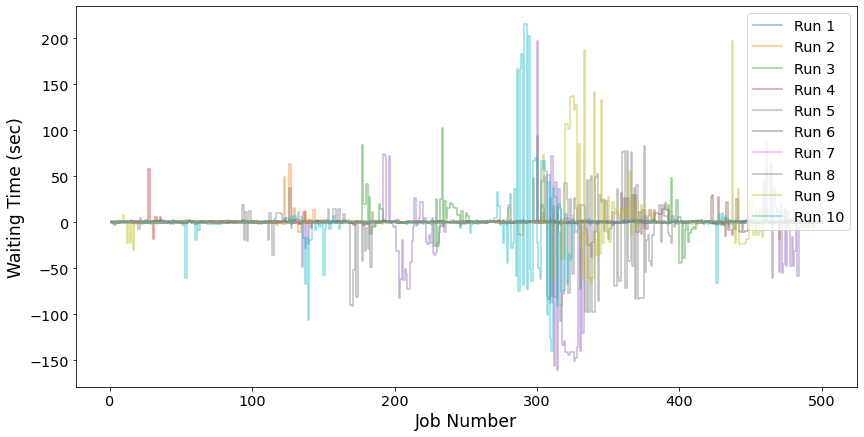

In [50]:
fig, ax = plt.subplots(figsize=[14,7])
# ax.xaxis.set_major_formatter(mdates.DateFormatter('%H:%M'))

runs=range(0,10)

compare_wait_all=compare_wait_all.set_index('run_num')

for run in compare_wait_all.index.unique():
    # Plot
    
    ax.step(compare_wait_all.loc[run]['Job Number'], 
        compare_wait_all.loc[run].delta_wait,
        where='post',
        label = f"Run {run}",
#         c='g',
        alpha=.5,
        )

compare_wait_all=compare_wait_all.reset_index()
    
ax.legend()
ax.set_xlabel('Job Number')
# ax.set_ylabel(r'PE Available / Max PE')
ax.set_ylabel('Waiting Time (sec)')

myrun_models = f"{myrun_type}_wait_jitter_plot_colour"
pltpath = f'{save_image_path}/debug/{myrun_shortname}_{myrun_models}.png'

# plt.savefig(pltpath, facecolor='w', transparent=False)

plt.show()

### Tables (combined W_PE (prio) and W_PE (prio2)   )

In [51]:
# TODO: ADD PRIORITY VALUE HERE AS WELL ... ??? 

runs=range(0,10)

list_compare_wait = []

for j in runs:
    st_acct = dic_st_prio_sacct[j].loc[:, ['JobName', 'pe_req', 'Account', 'Priority', 'wait_time']].copy()
    st_acct = st_acct.rename(columns={'pe_req':'job_pe_req'})
    st_acct = st_acct.rename(columns={'Priority':'sprio_start_value'})
    st_acct['priority'] = np.select([st_acct.Account == "training", st_acct.Account == "crucial"], ["Low", "High"])
    st_acct['priority_value'] = np.select([st_acct.Account == "training", st_acct.Account == "crucial"], [5000, 10000])
    st_acct['job_name'] = st_acct['JobName'].astype(int)
    st_acct['RunType'] = 'slurmtrain'
    st_acct['SchedType'] = 'Priority'

    sala_jobs = dic_sala_prio_dfjobs[j].loc[:, ['job_name', 'job_pe_req', "job_prio", 'wait_time']].copy()
    sala_jobs['job_prio'] = np.select([sala_jobs.job_prio == 1, sala_jobs.job_prio==10], [5000, 10000])               # HARDCODED FOR NOW! 2023/10/09
    sala_jobs['priority'] = np.select([sala_jobs.job_prio == 5000, sala_jobs.job_prio==10000], ["Low", "High"])       # HARDCODED FOR NOW! 2023/10/09
    sala_jobs = sala_jobs.rename(columns={'job_prio':'priority_value'})
    sala_jobs['job_name'] = sala_jobs['job_name'].astype(int)
    sala_jobs['RunType'] = 'salabim'
    sala_jobs['SchedType'] = 'Priority'

    compare_wait = pd.merge(left=sala_jobs, 
                            right=st_acct, 
                            how="inner",
                            on=["job_name", "job_pe_req", "priority", "priority_value"],
                            suffixes = ("_sala", "_st")
                            )
    
    compare_wait['Job Number'] = compare_wait.job_name - 1000 + 1
    compare_wait['run_num'] = j+1
    
    compare_wait['delta_wait'] = compare_wait.wait_time_st - compare_wait.wait_time_sala
  
    list_compare_wait.append(compare_wait)

#     # Plot
#     ax.step(compare_wait['Job Number'], 
#         compare_wait.wait_time_st - compare_wait.wait_time_sala,
#         where='post',
#         label = f"Jitter: SlurmTrain - SimPE",
#         c='g',
#         alpha=.5,
#         )

compare_wait_prio = (pd.concat(list_compare_wait)
                    .reset_index(drop=True)
                    .loc[:, ["run_num", "SchedType_st", "Job Number","job_name", 
                             "job_pe_req","priority","priority_value",
                             "wait_time_st", "wait_time_sala", "delta_wait"]]
                   )

compare_wait_prio

,run_num,SchedType_st,Job Number,job_name,job_pe_req,priority,priority_value,wait_time_st,wait_time_sala,delta_wait
0,1,Priority,1,1000,3,Low,5000,1.0,0.0,1.0
1,1,Priority,2,1001,3,High,10000,1.0,0.0,1.0
2,1,Priority,3,1002,1,Low,5000,1.0,0.0,1.0
3,1,Priority,4,1003,3,High,10000,1.0,0.0,1.0
4,1,Priority,5,1004,1,High,10000,1.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...
4995,10,Priority,496,1495,3,High,10000,1.0,0.0,1.0
4996,10,Priority,497,1496,1,Low,5000,9.0,8.0,1.0
4997,10,Priority,498,1497,3,Low,5000,11.0,10.0,1.0
4998,10,Priority,499,1498,3,Low,5000,30.0,29.0,1.0


In [52]:
# TODO: ADD PRIORITY VALUE HERE AS WELL ... ??? 

runs=range(0,10)

list_compare_wait = []

for j in runs:
    st_acct = dic_st_prio2_sacct[j].loc[:, ['JobName', 'pe_req', 'Account', 'Priority', 'wait_time']].copy()
    st_acct = st_acct.rename(columns={'pe_req':'job_pe_req'})
    st_acct = st_acct.rename(columns={'Priority':'sprio_start_value'})
    st_acct['priority'] = np.select([st_acct.Account == "training", st_acct.Account == "crucial"], ["Low", "High"])
    st_acct['priority_value'] = np.select([st_acct.Account == "training", st_acct.Account == "crucial"], [5000, 10000])
    st_acct['job_name'] = st_acct['JobName'].astype(int)
    st_acct['RunType'] = 'slurmtrain'
    st_acct['SchedType'] = 'Dynamic Priority'

    sala_jobs = dic_sala_prio2_dfjobs[j].loc[:, ['job_name', 'job_pe_req', "job_prio", 'wait_time']].copy()
    sala_jobs['priority'] = np.select([sala_jobs.job_prio == 5000, sala_jobs.job_prio==10000], ["Low", "High"])
    sala_jobs = sala_jobs.rename(columns={'job_prio':'priority_value'})
    sala_jobs['job_name'] = sala_jobs['job_name'].astype(int)
    sala_jobs['RunType'] = 'salabim'
    sala_jobs['SchedType'] = 'Dynamic Priority'

    compare_wait = pd.merge(left=sala_jobs, 
                            right=st_acct, 
                            how="inner",
                            on=["job_name", "job_pe_req", "priority", "priority_value"],
                            suffixes = ("_sala", "_st")
                            )
    
    compare_wait['Job Number'] = compare_wait.job_name - 1000 + 1
    compare_wait['run_num'] = j+1
    
    compare_wait['delta_wait'] = compare_wait.wait_time_st - compare_wait.wait_time_sala
  
    list_compare_wait.append(compare_wait)

#     # Plot
#     ax.step(compare_wait['Job Number'], 
#         compare_wait.wait_time_st - compare_wait.wait_time_sala,
#         where='post',
#         label = f"Jitter: SlurmTrain - SimPE",
#         c='g',
#         alpha=.5,
#         )

compare_wait_prio2 = (pd.concat(list_compare_wait)
                    .reset_index(drop=True)
                    .loc[:, ["run_num", "SchedType_st", "Job Number","job_name", 
                             "job_pe_req","priority","priority_value",
                             "wait_time_st", "wait_time_sala", "delta_wait"]]
                   )

compare_wait_prio2.head()

,run_num,SchedType_st,Job Number,job_name,job_pe_req,priority,priority_value,wait_time_st,wait_time_sala,delta_wait
0,1,Dynamic Priority,1,1000,3,Low,5000,1.0,0.0,1.0
1,1,Dynamic Priority,2,1001,3,High,10000,1.0,0.0,1.0
2,1,Dynamic Priority,3,1002,1,Low,5000,1.0,0.0,1.0
3,1,Dynamic Priority,4,1003,3,High,10000,1.0,0.0,1.0
4,1,Dynamic Priority,5,1004,1,High,10000,0.0,0.0,0.0


In [53]:
# Combine prio and prio2
compare_wait_all_prios = pd.merge(left=compare_wait_prio, 
                                    right=compare_wait_prio2, 
                                    how="inner",
                                    on=["run_num", "Job Number", "job_name", "job_pe_req", "priority", "priority_value"],
                                    suffixes = ("_prio", "_prio2")
                                    )

compare_wait_all_prios.head()

,run_num,SchedType_st_prio,Job Number,job_name,job_pe_req,priority,priority_value,wait_time_st_prio,wait_time_sala_prio,delta_wait_prio,SchedType_st_prio2,wait_time_st_prio2,wait_time_sala_prio2,delta_wait_prio2
0,1,Priority,1,1000,3,Low,5000,1.0,0.0,1.0,Dynamic Priority,1.0,0.0,1.0
1,1,Priority,2,1001,3,High,10000,1.0,0.0,1.0,Dynamic Priority,1.0,0.0,1.0
2,1,Priority,3,1002,1,Low,5000,1.0,0.0,1.0,Dynamic Priority,1.0,0.0,1.0
3,1,Priority,4,1003,3,High,10000,1.0,0.0,1.0,Dynamic Priority,1.0,0.0,1.0
4,1,Priority,5,1004,1,High,10000,1.0,0.0,1.0,Dynamic Priority,0.0,0.0,0.0


#### Wait Table All

In [54]:
compare_wait_all_prios.head()

,run_num,SchedType_st_prio,Job Number,job_name,job_pe_req,priority,priority_value,wait_time_st_prio,wait_time_sala_prio,delta_wait_prio,SchedType_st_prio2,wait_time_st_prio2,wait_time_sala_prio2,delta_wait_prio2
0,1,Priority,1,1000,3,Low,5000,1.0,0.0,1.0,Dynamic Priority,1.0,0.0,1.0
1,1,Priority,2,1001,3,High,10000,1.0,0.0,1.0,Dynamic Priority,1.0,0.0,1.0
2,1,Priority,3,1002,1,Low,5000,1.0,0.0,1.0,Dynamic Priority,1.0,0.0,1.0
3,1,Priority,4,1003,3,High,10000,1.0,0.0,1.0,Dynamic Priority,1.0,0.0,1.0
4,1,Priority,5,1004,1,High,10000,1.0,0.0,1.0,Dynamic Priority,0.0,0.0,0.0


In [55]:
wait_table_all = (compare_wait_all_prios
#  .query("run_num == 1")
 .loc[:, ['run_num', 'job_name', 'wait_time_sala_prio', 'wait_time_st_prio', 'wait_time_sala_prio2', 'wait_time_st_prio2']]
 .groupby('run_num')
 .agg({'job_name' : ['count'],
       'wait_time_st_prio' : ['mean'],
       'wait_time_sala_prio' : ['mean'],
       'wait_time_st_prio2' : ['mean'],
       'wait_time_sala_prio2' : ['mean']
      })
 .reset_index(drop=False)
)

wait_table_all["ratio_sala"] = wait_table_all.wait_time_sala_prio2 / wait_table_all.wait_time_sala_prio

wait_table_all["ratio_st"] = wait_table_all.wait_time_st_prio2 / wait_table_all.wait_time_st_prio

wait_table_all["ratio_prio2"] = wait_table_all.wait_time_sala_prio2 / wait_table_all.wait_time_st_prio2

# wait_table_all.columns = wait_table_all.columns.droplevel(1)

# wait_table_all = wait_table_all.rename(columns={'run_num':'Run Number'})

# wait_table_all.set_index('Run Number', inplace=True)

# mycolumns = [('', 'Run Number'),
#              ('', 'Job Count'), 
#              ('Waiting Time', 'SlurmTrain'),
#              ('Waiting Time', 'SimPE'),
#              ('Waiting Time', 'Delta')]

# wait_table_all.columns = pd.MultiIndex.from_tuples(mycolumns)

wait_table_all

,run_num,job_name,wait_time_st_prio,wait_time_sala_prio,wait_time_st_prio2,wait_time_sala_prio2,ratio_sala,ratio_st,ratio_prio2
,,count,mean,mean,mean,mean,,,
0,1,500,4.428,3.670,4.428,3.670,1.000000,1.000000,0.828817
1,2,500,11.118,10.174,10.834,10.024,0.985257,0.974456,0.925235
2,3,500,7.364,6.512,6.560,6.426,0.986794,0.890820,0.979573
3,4,500,11.436,10.282,11.212,10.320,1.003696,0.980413,0.920442
4,5,500,21.854,22.208,27.200,23.162,1.042957,1.244623,0.851544
5,6,500,9.866,8.082,9.262,8.022,0.992576,0.938780,0.866120
6,7,500,6.974,6.464,6.972,6.398,0.989790,0.999713,0.917671
7,8,500,29.058,31.506,31.962,30.886,0.980321,1.099938,0.966335
8,9,500,23.954,22.210,21.532,21.778,0.980549,0.898890,1.011425


In [56]:
table_name = f"{myrun_type}_wait_table_ST.tex"
table_path = Path(f'{save_image_path}/tables/{table_name}')

print(f"LATEX OUTPUT: {table_path}")
print(f"LATEX INCLUDE: {table_name}")
# print(f"LATEX INCLUDE: \input{{{str(table_path.relative_to('images'))}}}")
print("")

latex_table = (wait_table_all
    .loc[:, ["run_num", "wait_time_st_prio2", "wait_time_st_prio", "ratio_st"
             #, "delta"
            ]]
    .droplevel(1, axis=1)
    .to_latex(index = False,
            column_format = 'ccccc',
            header=["Run Number", 
                    r"$\overline{W}^{PRIO2}_{ST}$",
                    r"$\overline{W}^{PRIO}_{ST}$",
                    r"$\overline{W}^{PRIO2}_{ST} / \overline{W}^{PRIO}_{ST}$"
                    # ,r"$\overline{W}_{ST} - \overline{W}_{PE}$"
                   ],
            float_format="%.2f",
            escape = False)
)

print(latex_table)

# # Write Output
with open(table_path, 'w') as f:
    f.write(latex_table)

LATEX OUTPUT: images/results/tables/prio2run_wait_table_ST.tex
LATEX INCLUDE: prio2run_wait_table_ST.tex

\begin{tabular}{ccccc}
\toprule
Run Number & $\overline{W}^{PRIO2}_{ST}$ & $\overline{W}^{PRIO}_{ST}$ & $\overline{W}^{PRIO2}_{ST} / \overline{W}^{PRIO}_{ST}$ \\
\midrule
         1 &                        4.43 &                       4.43 &                                               1.00 \\
         2 &                       10.83 &                      11.12 &                                               0.97 \\
         3 &                        6.56 &                       7.36 &                                               0.89 \\
         4 &                       11.21 &                      11.44 &                                               0.98 \\
         5 &                       27.20 &                      21.85 &                                               1.24 \\
         6 &                        9.26 &                       9.87 &                      

In [57]:
table_name = f"{myrun_type}_wait_table_all.tex"
table_path = Path(f'{save_image_path}/tables/{table_name}')

print(f"LATEX OUTPUT: {table_path}")
print(f"LATEX INCLUDE: {table_name}")
# print(f"LATEX INCLUDE: \input{{{str(table_path.relative_to('images'))}}}")
print("")

latex_table = (wait_table_all
    .loc[:, ["run_num", "wait_time_sala_prio2", 
#              "wait_time_sala_prio", 
             "wait_time_st_prio2", 
#              "wait_time_st_prio", 
             "ratio_sala", "ratio_st", "ratio_prio2"
             #, "delta"
            ]]
    .droplevel(1, axis=1)
    .to_latex(index = False,
            column_format = 'cccccc',
            header=["Run Number", 
                    r"$\overline{W}^{(pri2)}_{PE}$", 
#                     r"$\overline{W}^{(pri)}_{PE}$", 
                    r"$\overline{W}^{(pri2)}_{ST}$",
#                     r"$\overline{W}^{(pri)}_{ST}$", 
                    r"$\overline{W}^{(pri2)}_{PE} / \overline{W}^{(pri)}_{PE}$",
                    r"$\overline{W}^{(pri2)}_{ST} / \overline{W}^{(pri)}_{ST}$",
                    r"$\overline{W}^{(pri2)}_{ST} / \overline{W}^{(pri2)}_{PE}$"
                   ],
            float_format="%.2f",
            escape = False)
)

print(latex_table)

# # Write Output
with open(table_path, 'w') as f:
    f.write(latex_table)

LATEX OUTPUT: images/results/tables/prio2run_wait_table_all.tex
LATEX INCLUDE: prio2run_wait_table_all.tex

\begin{tabular}{cccccc}
\toprule
Run Number & $\overline{W}^{(pri2)}_{PE}$ & $\overline{W}^{(pri2)}_{ST}$ & $\overline{W}^{(pri2)}_{PE} / \overline{W}^{(pri)}_{PE}$ & $\overline{W}^{(pri2)}_{ST} / \overline{W}^{(pri)}_{ST}$ & $\overline{W}^{(pri2)}_{ST} / \overline{W}^{(pri2)}_{PE}$ \\
\midrule
         1 &                         3.67 &                         4.43 &                                               1.00 &                                               1.00 &                                               0.83 \\
         2 &                        10.02 &                        10.83 &                                               0.99 &                                               0.97 &                                               0.93 \\
         3 &                         6.43 &                         6.56 &                                               0.99 

#### Wait Table PE

In [58]:
table_name = f"{myrun_type}_wait_table_PE.tex"
table_path = Path(f'{save_image_path}/tables/{table_name}')

print(f"LATEX OUTPUT: {table_path}")
print(f"LATEX INCLUDE: {table_name}")
# print(f"LATEX INCLUDE: \input{{{str(table_path.relative_to('images'))}}}")
print("")

latex_table = (wait_table_all
    .loc[:, ["run_num", "wait_time_sala_prio2", "wait_time_sala_prio", "ratio_sala"
             #, "delta"
            ]]
    .droplevel(1, axis=1)
    .to_latex(index = False,
            column_format = 'ccccc',
            header=["Run Number", 
                    r"$\overline{W}^{PRIO2}_{PE}$",
                    r"$\overline{W}^{PRIO}_{PE}$",
                    r"$\overline{W}^{PRIO2}_{PE} / \overline{W}^{PRIO}_{PE}$"
                    # ,r"$\overline{W}_{ST} - \overline{W}_{PE}$"
                   ],
            float_format="%.2f",
            escape = False)
)

print(latex_table)

# # Write Output
with open(table_path, 'w') as f:
    f.write(latex_table)

LATEX OUTPUT: images/results/tables/prio2run_wait_table_PE.tex
LATEX INCLUDE: prio2run_wait_table_PE.tex

\begin{tabular}{ccccc}
\toprule
Run Number & $\overline{W}^{PRIO2}_{PE}$ & $\overline{W}^{PRIO}_{PE}$ & $\overline{W}^{PRIO2}_{PE} / \overline{W}^{PRIO}_{PE}$ \\
\midrule
         1 &                        3.67 &                       3.67 &                                               1.00 \\
         2 &                       10.02 &                      10.17 &                                               0.99 \\
         3 &                        6.43 &                       6.51 &                                               0.99 \\
         4 &                       10.32 &                      10.28 &                                               1.00 \\
         5 &                       23.16 &                      22.21 &                                               1.04 \\
         6 &                        8.02 &                       8.08 &                      

#### Wait Table Metric

In [59]:
# wait_table_all

In [60]:
# Waiting time all jobs - metric table

wait_table_all_metrics = wait_table_all.copy()

wait_table_all_metrics.columns = wait_table_all_metrics.columns.droplevel(1)

# metrics = ['min', 'max',  'std', 'mean']
# metric_names = ['min', 'max', '$s_{dev}$', 'average']

wait_table_all_metrics = (wait_table_all_metrics
                          .drop(columns=['run_num', 'job_name'])
                          .agg(metrics)
                          .reset_index()
                          .rename(columns={'index':'metric'})
                          .assign(metric_name = metric_names)
                         )

wait_table_all_metrics

# wait_table_all.columns

,metric,wait_time_st_prio,wait_time_sala_prio,wait_time_st_prio2,wait_time_sala_prio2,ratio_sala,ratio_st,ratio_prio2,metric_name
0,min,4.428000,3.670000,4.428000,3.670000,0.980321,0.890820,0.828817,min
1,max,29.058000,31.506000,31.962000,30.886000,1.057546,1.244623,1.011425,max
2,std,8.865157,9.432661,9.913565,9.528751,0.026769,0.103640,0.060394,$s_{dev}$
3,mean,15.074600,14.394200,15.473200,14.483400,1.001949,1.003071,0.924205,average


In [61]:
table_name = f"{myrun_type}_wait_table_all_metrics.tex"
table_path = Path(f'{save_image_path}/tables/{table_name}')

print(f"LATEX OUTPUT: {table_path}")
print(f"LATEX INCLUDE: {table_name}")
# print(f"LATEX INCLUDE: \input{{{str(table_path.relative_to('images'))}}}")
print("")

latex_table = (wait_table_all_metrics
    .loc[:, ["metric_name", 
             "wait_time_sala_prio2", 
#              "wait_time_sala_prio", 
             "wait_time_st_prio2", 
#              "wait_time_st_prio", 
             "ratio_sala", "ratio_st", "ratio_prio2"
            ]]
    .to_latex(index = False,
            column_format = 'lccccc',
            header=["Metric", 
                    r"$\overline{W}^{(pri2)}_{PE}$", 
#                     r"$\overline{W}^{(pri)}_{PE}$", 
                    r"$\overline{W}^{(pri2)}_{ST}$",
#                     r"$\overline{W}^{(pri)}_{ST}$", 
                    r"$\overline{W}^{(pri2)}_{PE} / \overline{W}^{(pri)}_{PE}$",
                    r"$\overline{W}^{(pri2)}_{ST} / \overline{W}^{(pri)}_{ST}$",
                    r"$\overline{W}^{(pri2)}_{ST} / \overline{W}^{(pri2)}_{PE}$"
                   ],
            float_format="%.2f",
            escape = False)
)

# # Modifications to the latex table code:

# latex_list = latex_table.splitlines()

# new_header_list = [
# r"\begin{tabular}{lrrrr}",
# r"\toprule",
# r"& & \multicolumn{3}{c}{Average Waiting Time (sec)} \\ \cline{3-5}" ,
# r"Run Number & Count & SlurmTrain & SimPE & Delta \\",
# r"\midrule"
# ]

# latex_new_list = new_header_list + latex_list[2:]

# # # latex_list.insert(3, r'\cmidrule(lr){3-5} \\')

# # # for i,line in enumerate(latex_list): 
# # #     if line.find(r"\begin{table}") >= 0: 
# # #         latex_list[i] = r"\begin{table}[!ht]"

# latex_new_table = "\n".join(latex_new_list)
    
# print(latex_new_table)

print(latex_table)

# # Write Output
with open(table_path, 'w') as f:
    f.write(latex_table)

LATEX OUTPUT: images/results/tables/prio2run_wait_table_all_metrics.tex
LATEX INCLUDE: prio2run_wait_table_all_metrics.tex

\begin{tabular}{lccccc}
\toprule
    Metric & $\overline{W}^{(pri2)}_{PE}$ & $\overline{W}^{(pri2)}_{ST}$ & $\overline{W}^{(pri2)}_{PE} / \overline{W}^{(pri)}_{PE}$ & $\overline{W}^{(pri2)}_{ST} / \overline{W}^{(pri)}_{ST}$ & $\overline{W}^{(pri2)}_{ST} / \overline{W}^{(pri2)}_{PE}$ \\
\midrule
       min &                         3.67 &                         4.43 &                                               0.98 &                                               0.89 &                                               0.83 \\
       max &                        30.89 &                        31.96 &                                               1.06 &                                               1.24 &                                               1.01 \\
 $s_{dev}$ &                         9.53 &                         9.91 &                                    

#### Wait Table Job Type

In [62]:
# Waiting Time per job

wait_table_jobtype_all = (compare_wait_all_prios
#  .query("run_num == 1")
 .loc[:, ['run_num', 'job_pe_req', 'priority', 'priority_value', 'job_name', 'wait_time_st_prio', 'wait_time_sala_prio', 'wait_time_st_prio2', 'wait_time_sala_prio2']]
 .assign(str_job_pe_req = lambda x: x.job_pe_req.astype(str))
 .groupby(['run_num','str_job_pe_req', 'priority', 'priority_value'])
 .agg({'job_name' : ['count'],
       'wait_time_sala_prio' : ['mean'],
       'wait_time_st_prio' : ['mean'],
       'wait_time_sala_prio2' : ['mean'],
       'wait_time_st_prio2' : ['mean']
      })
 .reset_index(drop=False)
)

wait_table_jobtype_all["ratio_sala"] = wait_table_jobtype_all.wait_time_sala_prio2 / wait_table_jobtype_all.wait_time_sala_prio
wait_table_jobtype_all["ratio_st"] = wait_table_jobtype_all.wait_time_st_prio2 / wait_table_jobtype_all.wait_time_st_prio
wait_table_jobtype_all["ratio_prio2"] = wait_table_jobtype_all.wait_time_sala_prio2 / wait_table_jobtype_all.wait_time_st_prio2


wait_table_jobtype_all.columns = wait_table_jobtype_all.columns.droplevel(1)
wait_table_jobtype_all.rename(columns={'job_name':'job_count',
                                       'str_job_pe_req' : 'job_pe_req'}, inplace=True)

wait_table_jobtype_all["job_type"] = (wait_table_jobtype_all.job_pe_req + 
    " PE - priority: " + 
    wait_table_jobtype_all.priority_value.apply(lambda x : "{:,}".format(x)).astype(str)
)

wait_table_jobtype_all.head()

,run_num,job_pe_req,priority,priority_value,job_count,wait_time_sala_prio,wait_time_st_prio,wait_time_sala_prio2,wait_time_st_prio2,ratio_sala,ratio_st,ratio_prio2,job_type
0,1,1,High,10000,142,1.345070,1.880282,1.345070,1.992958,1.000000,1.059925,0.674912,"1 PE - priority: 10,000"
1,1,1,Low,5000,115,2.921739,3.713043,2.921739,3.660870,1.000000,0.985948,0.798100,"1 PE - priority: 5,000"
2,1,3,High,10000,115,5.800000,6.200000,5.800000,6.182609,1.000000,0.997195,0.938115,"3 PE - priority: 10,000"
3,1,3,Low,5000,128,5.007812,6.304688,5.007812,6.242188,1.000000,0.990087,0.802253,"3 PE - priority: 5,000"
4,2,1,High,10000,114,3.657895,4.210526,4.657895,4.614035,1.273381,1.095833,1.009506,"1 PE - priority: 10,000"


In [63]:
batch_count = wait_table_jobtype_all.run_num.max()

wait_table_jobtype_table = (wait_table_jobtype_all
                            .groupby(["priority", "job_pe_req", "job_type"])
                            .agg({'job_count' : ['sum'],
                                  'wait_time_sala_prio' : ['mean'],
                                   'wait_time_st_prio' : ['mean'],
                                   'wait_time_sala_prio2' : ['mean'],
                                   'wait_time_st_prio2' : ['mean']})
                            .sort_index(ascending=[False, True])
                            .droplevel(1,axis=1)
                            .reset_index(drop=False)
                            .assign(ratio_sala = lambda x: x.wait_time_sala_prio2 / x.wait_time_sala_prio)
                            .assign(ratio_st = lambda x: x.wait_time_st_prio2 / x.wait_time_st_prio)
                            .assign(ratio_prio2 = lambda x: x.wait_time_sala_prio2 / x.wait_time_st_prio2)
                            .assign(jobs_per_batch = lambda x: x.job_count / batch_count)
                            # .drop(columns='priority')
)

wait_table_jobtype_table

,priority,job_pe_req,job_type,job_count,wait_time_sala_prio,wait_time_st_prio,wait_time_sala_prio2,wait_time_st_prio2,ratio_sala,ratio_st,ratio_prio2,jobs_per_batch
0,Low,1,"1 PE - priority: 5,000",1239,15.131656,19.462993,14.695545,17.562591,0.971179,0.902358,0.836753,123.9
1,Low,3,"3 PE - priority: 5,000",1240,22.410561,26.958340,20.836664,23.398024,0.929770,0.867933,0.890531,124.0
2,High,1,"1 PE - priority: 10,000",1222,6.703491,3.951941,7.888471,7.338345,1.176771,1.856896,1.074966,122.2
3,High,3,"3 PE - priority: 10,000",1299,12.991346,9.720658,14.226117,13.394197,1.095046,1.377911,1.062110,129.9


In [64]:
table_name = f"{myrun_type}_wait_table_jobtypes.tex"
table_path = Path(f'{save_image_path}/tables/{table_name}')

print(f"LATEX OUTPUT: {table_path}")
print(f"LATEX INCLUDE: {table_name}")
print("")

latex_table = (wait_table_jobtype_table
               .loc[:, ['job_type', 'jobs_per_batch', 'wait_time_sala_prio2', 'wait_time_st_prio2', 'ratio_sala', 'ratio_st', 'ratio_prio2']]
               .to_latex(
    index=False,
    column_format='lcccccc',
    header=["Job Type", 
            r"\begin{tabular}[c]{@{}c@{}}Average Jobs\\ Per Batch\end{tabular}",
            r"$\mu^{(pri2)}_{\overline{W}_{PE}}$",
            r"$\mu^{(pri2)}_{\overline{W}_{ST}}$",
            r"$\mu^{(pri2)}_{\overline{W}_{PE}} / \mu^{(pri)}_{\overline{W}_{PE}}$" ,            
            r"$\mu^{(pri2)}_{\overline{W}_{ST}} / \mu^{(pri)}_{\overline{W}_{ST}}$" ,            
            r"$\mu^{(pri2)}_{\overline{W}_{PE}} / \mu^{(pri2)}_{\overline{W}_{ST}}$" #,
            #r"$\mu_{\overline{W}_{ST}} - \mu_{\overline{W}_{PE}}$"
           ],
    float_format="%.2f",
    escape = False) 
)
    
print(latex_table)
    
# # # Write Output
with open(table_path, 'w') as f:
    f.write(latex_table)

LATEX OUTPUT: images/results/tables/prio2run_wait_table_jobtypes.tex
LATEX INCLUDE: prio2run_wait_table_jobtypes.tex

\begin{tabular}{lcccccc}
\toprule
                Job Type & \begin{tabular}[c]{@{}c@{}}Average Jobs\\ Per Batch\end{tabular} & $\mu^{(pri2)}_{\overline{W}_{PE}}$ & $\mu^{(pri2)}_{\overline{W}_{ST}}$ & $\mu^{(pri2)}_{\overline{W}_{PE}} / \mu^{(pri)}_{\overline{W}_{PE}}$ & $\mu^{(pri2)}_{\overline{W}_{ST}} / \mu^{(pri)}_{\overline{W}_{ST}}$ & $\mu^{(pri2)}_{\overline{W}_{PE}} / \mu^{(pri2)}_{\overline{W}_{ST}}$ \\
\midrule
  1 PE - priority: 5,000 &                                             123.90 &                              14.70 &                              17.56 &                                               0.97 &                                               0.90 &                                               0.84 \\
  3 PE - priority: 5,000 &                                             124.00 &                              20.84 &                          

#### Table showing change in Priority Table

In [69]:
compare_wait_all_prios.priority_value.unique()

array([ 5000, 10000])

In [71]:
# dic_st_prio2_sacct[0]

In [72]:
# runs=range(0,10)

# list_compare_wait = []

# for j in runs:
#     st_acct = dic_st_prio2_sacct[j].loc[:, ['JobName', 'pe_req', 'Account', 'Priority', 'wait_time']].copy()
#     st_acct = st_acct.rename(columns={'pe_req':'job_pe_req'})
#     st_acct = st_acct.rename(columns={'Priority':'sprio_start_value'})
#     st_acct['priority'] = np.select([st_acct.Account == "training", st_acct.Account == "crucial"], ["Low", "High"])
#     st_acct['priority_value'] = np.select([st_acct.Account == "training", st_acct.Account == "crucial"], [5000, 10000])
#     st_acct['job_name'] = st_acct['JobName'].astype(int)
#     st_acct['RunType'] = 'slurmtrain'
#     st_acct['SchedType'] = 'Dynamic Priority'

#     sala_jobs = dic_sala_prio2_dfjobs[j].loc[:, ['job_name', 'job_pe_req', "job_prio", 'wait_time']].copy()
#     sala_jobs['priority'] = np.select([sala_jobs.job_prio == 5000, sala_jobs.job_prio==10000], ["Low", "High"])
#     sala_jobs = sala_jobs.rename(columns={'job_prio':'priority_value'})
#     sala_jobs['job_name'] = sala_jobs['job_name'].astype(int)
#     sala_jobs['RunType'] = 'salabim'
#     sala_jobs['SchedType'] = 'Dynamic Priority'

#     compare_wait = pd.merge(left=sala_jobs, 
#                             right=st_acct, 
#                             how="inner",
#                             on=["job_name", "job_pe_req", "priority", "priority_value"],
#                             suffixes = ("_sala", "_st")
#                             )
    
#     compare_wait['Job Number'] = compare_wait.job_name - 1000 + 1
#     compare_wait['run_num'] = j+1
    
#     compare_wait['delta_wait'] = compare_wait.wait_time_st - compare_wait.wait_time_sala
  
#     list_compare_wait.append(compare_wait)

# #     # Plot
# #     ax.step(compare_wait['Job Number'], 
# #         compare_wait.wait_time_st - compare_wait.wait_time_sala,
# #         where='post',
# #         label = f"Jitter: SlurmTrain - SimPE",
# #         c='g',
# #         alpha=.5,
# #         )

# compare_wait_prio2 = (pd.concat(list_compare_wait)
#                     .reset_index(drop=True)
#                     .loc[:, ["run_num", "SchedType_st", "Job Number","job_name", 
#                              "job_pe_req","priority","priority_value",
#                              "wait_time_st", "wait_time_sala", "delta_wait"]]
#                    )

# compare_wait_prio2.head()





### Tables (separate W_PE and W_ST)

In [493]:
# list(dic_st_prio2_sacct[0].columns)

dic_st_prio2_sacct[0].Priority.unique()

array(['5000', '10000', '5166', '10166', '5083'], dtype=object)

In [494]:
# TODO: ADD PRIORITY VALUE HERE AS WELL ... ??? 

runs=range(0,10)

list_compare_wait = []

for j in runs:
    st_acct = dic_st_prio2_sacct[j].loc[:, ['JobName', 'pe_req', 'Account', 'Priority', 'wait_time']].copy()
    st_acct = st_acct.rename(columns={'pe_req':'job_pe_req'})
    st_acct = st_acct.rename(columns={'Priority':'sprio_start_value'})
    st_acct['priority'] = np.select([st_acct.Account == "training", st_acct.Account == "crucial"], ["Low", "High"])
    st_acct['priority_value'] = np.select([st_acct.Account == "training", st_acct.Account == "crucial"], [5000, 10000])
    st_acct['job_name'] = st_acct['JobName'].astype(int)
    st_acct['RunType'] = 'slurmtrain'
    st_acct['SchedType'] = 'Dynamic Priority'

    sala_jobs = dic_sala_prio2_dfjobs[j].loc[:, ['job_name', 'job_pe_req', "job_prio", 'wait_time']].copy()
    sala_jobs['priority'] = np.select([sala_jobs.job_prio == 5000, sala_jobs.job_prio==10000], ["Low", "High"])
    sala_jobs = sala_jobs.rename(columns={'job_prio':'priority_value'})
    sala_jobs['job_name'] = sala_jobs['job_name'].astype(int)
    sala_jobs['RunType'] = 'salabim'
    sala_jobs['SchedType'] = 'Dynamic Priority'

    compare_wait = pd.merge(left=sala_jobs, 
                            right=st_acct, 
                            how="inner",
                            on=["job_name", "job_pe_req", "priority", "priority_value"],
                            suffixes = ("_sala", "_st")
                            )
    
    compare_wait['Job Number'] = compare_wait.job_name - 1000 + 1
    compare_wait['run_num'] = j+1
    
    compare_wait['delta_wait'] = compare_wait.wait_time_st - compare_wait.wait_time_sala
  
    list_compare_wait.append(compare_wait)

#     # Plot
#     ax.step(compare_wait['Job Number'], 
#         compare_wait.wait_time_st - compare_wait.wait_time_sala,
#         where='post',
#         label = f"Jitter: SlurmTrain - SimPE",
#         c='g',
#         alpha=.5,
#         )

compare_wait_all = (pd.concat(list_compare_wait)
                    .reset_index(drop=True)
                    .loc[:, ["run_num", "SchedType_st", "Job Number","job_name", 
                             "job_pe_req","priority","priority_value",
                             "wait_time_st", "wait_time_sala", "delta_wait"]]
                   )

In [495]:
wait_table_all = (compare_wait_all
#  .query("run_num == 1")
 .loc[:, ['run_num', 'job_name', 'wait_time_st', 'wait_time_sala', 'delta_wait']]
 .groupby('run_num')
 .agg({'job_name' : ['count'],
       'wait_time_st' : ['mean'],
       'wait_time_sala' : ['mean']})
 .reset_index(drop=False)
)

wait_table_all["ratio"] = wait_table_all.wait_time_sala / wait_table_all.wait_time_st

wait_table_all["delta"] = wait_table_all.wait_time_st - wait_table_all.wait_time_sala

# wait_table_all.columns = wait_table_all.columns.droplevel(1)

# wait_table_all = wait_table_all.rename(columns={'run_num':'Run Number'})

# wait_table_all.set_index('Run Number', inplace=True)

# mycolumns = [('', 'Run Number'),
#              ('', 'Job Count'), 
#              ('Waiting Time', 'SlurmTrain'),
#              ('Waiting Time', 'SimPE'),
#              ('Waiting Time', 'Delta')]

# wait_table_all.columns = pd.MultiIndex.from_tuples(mycolumns)

wait_table_all

,run_num,job_name,wait_time_st,wait_time_sala,ratio,delta
,,count,mean,mean,,
0,1,500,4.428,3.670,0.828817,0.758
1,2,500,10.834,10.024,0.925235,0.810
2,3,500,6.560,6.426,0.979573,0.134
3,4,500,11.212,10.320,0.920442,0.892
4,5,500,27.200,23.162,0.851544,4.038
5,6,500,9.262,8.022,0.866120,1.240
6,7,500,6.972,6.398,0.917671,0.574
7,8,500,31.962,30.886,0.966335,1.076
8,9,500,21.532,21.778,1.011425,-0.246


In [496]:
table_name = f"{myrun_type}_wait_table_all.tex"
table_path = Path(f'{save_image_path}/tables/{table_name}')

print(f"LATEX OUTPUT: {table_path}")
print(f"LATEX INCLUDE: {table_name}")
# print(f"LATEX INCLUDE: \input{{{str(table_path.relative_to('images'))}}}")
print("")

latex_table = (wait_table_all
    .loc[:, ["run_num", "wait_time_sala", "wait_time_st", "ratio"
             #, "delta"
            ]]
    .droplevel(1, axis=1)
    .to_latex(index = False,
            column_format = 'ccccc',
            header=["Run Number", 
                    r"$\overline{W}_{PE}$",
                    r"$\overline{W}_{ST}$",
                    r"$\overline{W}_{PE} / \overline{W}_{ST}$"
                    # ,r"$\overline{W}_{ST} - \overline{W}_{PE}$"
                   ],
            float_format="%.2f",
            escape = False)
)

# # Modifications to the latex table code:

# latex_list = latex_table.splitlines()

# new_header_list = [
# r"\begin{tabular}{lrrrr}",
# r"\toprule",
# r"& & \multicolumn{3}{c}{Average Waiting Time (sec)} \\ \cline{3-5}" ,
# r"Run Number & Count & SlurmTrain & SimPE & Delta \\",
# r"\midrule"
# ]

# latex_new_list = new_header_list + latex_list[2:]

# # # latex_list.insert(3, r'\cmidrule(lr){3-5} \\')

# # # for i,line in enumerate(latex_list): 
# # #     if line.find(r"\begin{table}") >= 0: 
# # #         latex_list[i] = r"\begin{table}[!ht]"

# latex_new_table = "\n".join(latex_new_list)
    
# print(latex_new_table)

print(latex_table)

# # # Write Output
# with open(table_path, 'w') as f:
#     f.write(latex_table)

LATEX OUTPUT: images/results/tables/prio2run_wait_table_all.tex
LATEX INCLUDE: prio2run_wait_table_all.tex

\begin{tabular}{ccccc}
\toprule
Run Number & $\overline{W}_{PE}$ & $\overline{W}_{ST}$ & $\overline{W}_{PE} / \overline{W}_{ST}$ \\
\midrule
         1 &                3.67 &                4.43 &                                    0.83 \\
         2 &               10.02 &               10.83 &                                    0.93 \\
         3 &                6.43 &                6.56 &                                    0.98 \\
         4 &               10.32 &               11.21 &                                    0.92 \\
         5 &               23.16 &               27.20 &                                    0.85 \\
         6 &                8.02 &                9.26 &                                    0.87 \\
         7 &                6.40 &                6.97 &                                    0.92 \\
         8 &               30.89 &               31

In [497]:
# wait_table_jobtype_all.priority_value.apply(lambda x : "{:,}".format(x)).astype(str)

In [498]:
compare_wait_all

,run_num,SchedType_st,Job Number,job_name,job_pe_req,priority,priority_value,wait_time_st,wait_time_sala,delta_wait
0,1,Dynamic Priority,1,1000,3,Low,5000,1.0,0.0,1.0
1,1,Dynamic Priority,2,1001,3,High,10000,1.0,0.0,1.0
2,1,Dynamic Priority,3,1002,1,Low,5000,1.0,0.0,1.0
3,1,Dynamic Priority,4,1003,3,High,10000,1.0,0.0,1.0
4,1,Dynamic Priority,5,1004,1,High,10000,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...
4995,10,Dynamic Priority,496,1495,3,High,10000,1.0,0.0,1.0
4996,10,Dynamic Priority,497,1496,1,Low,5000,9.0,8.0,1.0
4997,10,Dynamic Priority,498,1497,3,Low,5000,11.0,10.0,1.0
4998,10,Dynamic Priority,499,1498,3,Low,5000,30.0,29.0,1.0


In [499]:
# Waiting Time per job 

wait_table_jobtype_all = (compare_wait_all
#  .query("run_num == 1")
 .loc[:, ['run_num', 'job_pe_req', 'priority', 'priority_value', 'job_name', 'wait_time_st', 'wait_time_sala', 'delta_wait']]
 .assign(str_job_pe_req = lambda x: x.job_pe_req.astype(str))
 .groupby(['run_num','str_job_pe_req', 'priority', 'priority_value'])
 .agg({'job_name' : ['count'],
       'wait_time_sala' : ['mean'],
       'wait_time_st' : ['mean']})
 .reset_index(drop=False)
)

wait_table_jobtype_all["ratio"] = wait_table_jobtype_all.wait_time_sala / wait_table_jobtype_all.wait_time_st

wait_table_jobtype_all["delta"] = wait_table_jobtype_all.wait_time_st - wait_table_jobtype_all.wait_time_sala

wait_table_jobtype_all.columns = wait_table_jobtype_all.columns.droplevel(1)
wait_table_jobtype_all.rename(columns={'job_name':'job_count',
                                       'str_job_pe_req' : 'job_pe_req'}, inplace=True)

wait_table_jobtype_all["job_type"] = (wait_table_jobtype_all.job_pe_req + 
    " PE - priority: " + 
    wait_table_jobtype_all.priority_value.apply(lambda x : "{:,}".format(x)).astype(str)
)

wait_table_jobtype_all.head()

,run_num,job_pe_req,priority,priority_value,job_count,wait_time_sala,wait_time_st,ratio,delta,job_type
0,1,1,High,10000,142,1.345070,1.992958,0.674912,0.647887,"1 PE - priority: 10,000"
1,1,1,Low,5000,115,2.921739,3.660870,0.798100,0.739130,"1 PE - priority: 5,000"
2,1,3,High,10000,115,5.800000,6.182609,0.938115,0.382609,"3 PE - priority: 10,000"
3,1,3,Low,5000,128,5.007812,6.242188,0.802253,1.234375,"3 PE - priority: 5,000"
4,2,1,High,10000,114,4.657895,4.614035,1.009506,-0.043860,"1 PE - priority: 10,000"


In [500]:
batch_count = wait_table_jobtype_all.run_num.max()

wait_table_jobtype_table = (wait_table_jobtype_all
                            .groupby(["priority", "job_pe_req", "job_type"])
                            .agg({'job_count' : ['sum'],
                                  'wait_time_sala' :['mean'],
                                  'wait_time_st' :['mean']})
                            .sort_index(ascending=[False, True])
                            .droplevel(1,axis=1)
                            .reset_index(drop=False)
                            .assign(ratio = lambda x: x.wait_time_sala / x.wait_time_st)
                            .assign(delta = lambda x: x.wait_time_st - x.wait_time_sala)
                            .assign(jobs_per_batch = lambda x: x.job_count / batch_count)
                            .drop(columns='priority')
)

wait_table_jobtype_table

,job_pe_req,job_type,job_count,wait_time_sala,wait_time_st,ratio,delta,jobs_per_batch
0,1,"1 PE - priority: 5,000",1239,14.695545,17.562591,0.836753,2.867045,123.9
1,3,"3 PE - priority: 5,000",1240,20.836664,23.398024,0.890531,2.561360,124.0
2,1,"1 PE - priority: 10,000",1222,7.888471,7.338345,1.074966,-0.550125,122.2
3,3,"3 PE - priority: 10,000",1299,14.226117,13.394197,1.062110,-0.831920,129.9


In [501]:
table_name = f"{myrun_type}_wait_table_jobtypes.tex"
table_path = Path(f'{save_image_path}/tables/{table_name}')

print(f"LATEX OUTPUT: {table_path}")
print(f"LATEX INCLUDE: {table_name}")
print("")

latex_table = (wait_table_jobtype_table
               .loc[:, ['job_type', 'jobs_per_batch', 'wait_time_sala', 'wait_time_st', 'ratio']]
               .to_latex(
    index=False,
    column_format='lccccc',
    header=["Job Type", 
            "Average Jobs Per Batch",
            r"$\mu_{\overline{W}_{PE}}$",
            r"$\mu_{\overline{W}_{ST}}$",
            r"$\mu_{\overline{W}_{PE}} / \mu_{\overline{W}_{ST}}$" #,
            #r"$\mu_{\overline{W}_{ST}} - \mu_{\overline{W}_{PE}}$"
           ],
    float_format="%.2f",
    escape = False) 
)
    
print(latex_table)
    
# # # Write Output
# with open(table_path, 'w') as f:
#     f.write(latex_table)

LATEX OUTPUT: images/results/tables/prio2run_wait_table_jobtypes.tex
LATEX INCLUDE: prio2run_wait_table_jobtypes.tex

\begin{tabular}{lccccc}
\toprule
                Job Type & Average Jobs Per Batch & $\mu_{\overline{W}_{PE}}$ & $\mu_{\overline{W}_{ST}}$ & $\mu_{\overline{W}_{PE}} / \mu_{\overline{W}_{ST}}$ \\
\midrule
  1 PE - priority: 5,000 &                 123.90 &                     14.70 &                     17.56 &                                               0.84 \\
  3 PE - priority: 5,000 &                 124.00 &                     20.84 &                     23.40 &                                               0.89 \\
 1 PE - priority: 10,000 &                 122.20 &                      7.89 &                      7.34 &                                               1.07 \\
 3 PE - priority: 10,000 &                 129.90 &                     14.23 &                     13.39 &                                               1.06 \\
\bottomrule
\end{tabular}



### OLD Wait Tables (delta)

In [502]:
wait_table_all = (compare_wait_all
#  .query("run_num == 1")
 .loc[:, ['run_num', 'job_name', 'wait_time_st', 'wait_time_sala', 'delta_wait']]
 .groupby('run_num')
 .agg({'job_name' : ['count'],
       'wait_time_st' : ['mean'],
       'wait_time_sala' : ['mean']})
 .reset_index(drop=False)
)

wait_table_all["delta"] = wait_table_all.wait_time_st - wait_table_all.wait_time_sala

# wait_table_all.columns = wait_table_all.columns.droplevel(1)

# wait_table_all = wait_table_all.rename(columns={'run_num':'Run Number'})

# wait_table_all.set_index('Run Number', inplace=True)

# mycolumns = [('', 'Run Number'),
#              ('', 'Job Count'), 
#              ('Waiting Time', 'SlurmTrain'),
#              ('Waiting Time', 'SimPE'),
#              ('Waiting Time', 'Delta')]

# wait_table_all.columns = pd.MultiIndex.from_tuples(mycolumns)

wait_table_all

,run_num,job_name,wait_time_st,wait_time_sala,delta
,,count,mean,mean,
0,1,500,4.428,3.670,0.758
1,2,500,10.834,10.024,0.810
2,3,500,6.560,6.426,0.134
3,4,500,11.212,10.320,0.892
4,5,500,27.200,23.162,4.038
5,6,500,9.262,8.022,1.240
6,7,500,6.972,6.398,0.574
7,8,500,31.962,30.886,1.076
8,9,500,21.532,21.778,-0.246


In [503]:
table_name = f"{myrun_type}_wait_table_all.tex"
table_path = Path(f'{save_image_path}/tables/{table_name}')

print(f"LATEX OUTPUT: {table_path}")
print(f"LATEX INCLUDE: {table_name}")
# print(f"LATEX INCLUDE: \input{{{str(table_path.relative_to('images'))}}}")
print("")

latex_table = wait_table_all.to_latex(column_format='lrrrr',
#                                       multirow=True,
                                      header=False,
                                      index=False
#                                       multicolumn_format='c'
                                      # caption="FIFO Results Table",
                                      # label=table_name
                                     )

# Modifications to the latex table code:

latex_list = latex_table.splitlines()

new_header_list = [
r"\begin{tabular}{lrrrr}",
r"\toprule",
r"& & \multicolumn{3}{c}{Waiting Time (sec)} \\ \cline{3-5}" ,
r"Run Number & Count & SlurmTrain & SimPE & Delta \\",
r"\midrule"
]

latex_new_list = new_header_list + latex_list[2:]

# # latex_list.insert(3, r'\cmidrule(lr){3-5} \\')

# # for i,line in enumerate(latex_list): 
# #     if line.find(r"\begin{table}") >= 0: 
# #         latex_list[i] = r"\begin{table}[!ht]"

latex_new_table = "\n".join(latex_new_list)
    
print(latex_new_table)
    
# # Write Output
# with open(table_path, 'w') as f:
#     f.write(latex_new_table)

LATEX OUTPUT: images/results/tables/prio2run_wait_table_all.tex
LATEX INCLUDE: prio2run_wait_table_all.tex

\begin{tabular}{lrrrr}
\toprule
& & \multicolumn{3}{c}{Waiting Time (sec)} \\ \cline{3-5}
Run Number & Count & SlurmTrain & SimPE & Delta \\
\midrule
  1 &  500 &   4.428 &   3.670 &  0.758 \\
  2 &  500 &  10.834 &  10.024 &  0.810 \\
  3 &  500 &   6.560 &   6.426 &  0.134 \\
  4 &  500 &  11.212 &  10.320 &  0.892 \\
  5 &  500 &  27.200 &  23.162 &  4.038 \\
  6 &  500 &   9.262 &   8.022 &  1.240 \\
  7 &  500 &   6.972 &   6.398 &  0.574 \\
  8 &  500 &  31.962 &  30.886 &  1.076 \\
  9 &  500 &  21.532 &  21.778 & -0.246 \\
 10 &  500 &  24.770 &  24.148 &  0.622 \\
\bottomrule
\end{tabular}


### Histograms

### Waiting time

In [504]:
# ?sns.catplot
# ?sns.relplot

In [505]:
# ?sns.FacetGrid

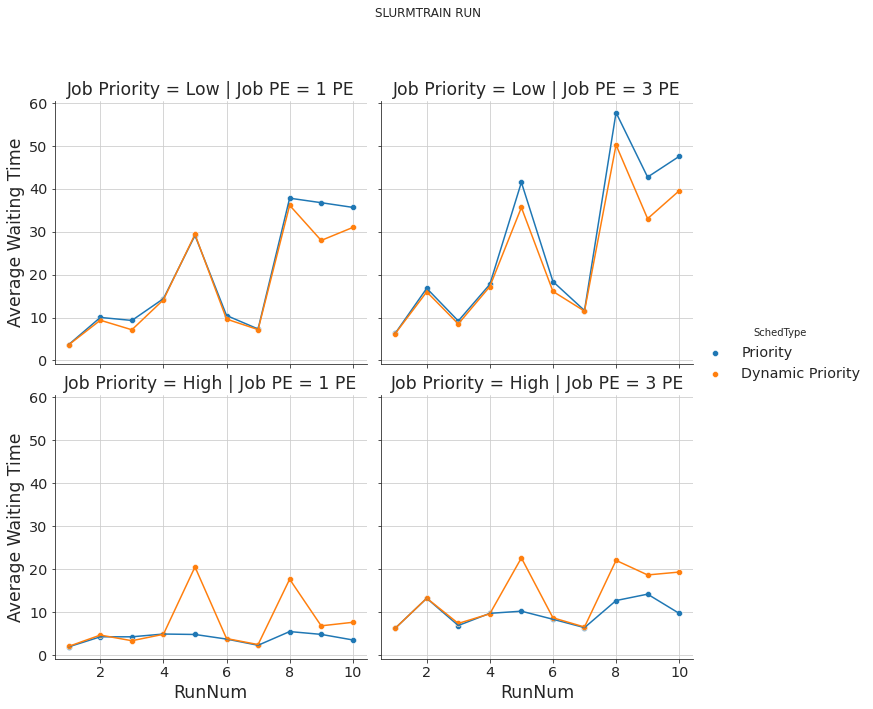

In [506]:
# Job Priority Graph

fg = sns.FacetGrid(df_plot, 
                    hue = "SchedType",
#                     hue_order = ['Dynamic Priority', 'Priority'],
                    row = "Job Priority",
                    col = "Job PE",
                    height = 5
                  )

fg.map(sns.scatterplot, "RunNum", "wait_time_mean")
fg.map(sns.lineplot, "RunNum", "wait_time_mean")
fg.add_legend()

fg.set_ylabels("Average Waiting Time")

myrun_models = "slurmtrain_simpe"

pltname = f"{myrun_shortname}_{myrun_models}.png"
pltpath = save_image_path / pltname

plt.suptitle("SLURMTRAIN RUN")
plt.subplots_adjust(top=0.85)
plt.savefig(pltpath.absolute(), facecolor='w', transparent=False)

plt.show()

In [507]:
# My idee hier was ... om die maximum waiting time van die low priority runs minder te verminder ... 

In [508]:
# # Job Priority2 Graph

# fg = sns.FacetGrid(df_plot_prio2, 
#                     hue = "Model",
#                     row = "Job Priority",
#                     col = "Job PE",
#                     height = 7
#                   )

# fg.map(sns.scatterplot, "RunNum", "wait_time_mean")
# fg.map(sns.lineplot, "RunNum", "wait_time_mean")
# fg.add_legend()

# plt.show()

### Count the Timeouts

In [509]:
# for i in range(10):
#     df = dic_st_prio_sacct[i]
#     timeout_count = df.loc[df.State != 'COMPLETED', 'State'].value_counts()
#     if len(timeout_count) > 0 or df.shape[0] != 500: print(f"run:{i+1}. prio, rows: {df.shape[0]}, {timeout_count}. \n")

In [510]:
# for i in range(10):
#     df = dic_st_prio2_sacct[i]
#     timeout_count = df.loc[df.State != 'COMPLETED', 'State'].value_counts()
#     if len(timeout_count) > 0 or df.shape[0] != 500: print(f"run:{i+1}. prio2, rows: {df.shape[0]}, {timeout_count}. \n")

The timeouts don't matter, the run counts do though ... they did run. probably only lost a second or so.

### PE Time Graph for Run 8

#### Single Graph

In [511]:
iplotrun = 9 # run 9
j = iplotrun - 1
st_prio_petime = dic_st_prio_petime[j]
st_prio_petime['RunType'] = 'slurmtrain'
st_prio_petime['SchedType'] = 'Priority'

st_prio2_petime = dic_st_prio2_petime[j]
st_prio2_petime['RunType'] = 'slurmtrain'
st_prio2_petime['SchedType'] = 'Dynamic Priority'

# Only show first 100 jobs
n = 200
st_prio_petime = st_prio_petime.loc[0:2*n].copy()
st_prio2_petime = st_prio2_petime.loc[0:2*n].copy()

# plot_petime = pd.concat([st_prio_petime,
#                          st_prio2_petime])

In [512]:
# Lets plot the pe time 

# plot_petime.head()
# plot_petime.tail()

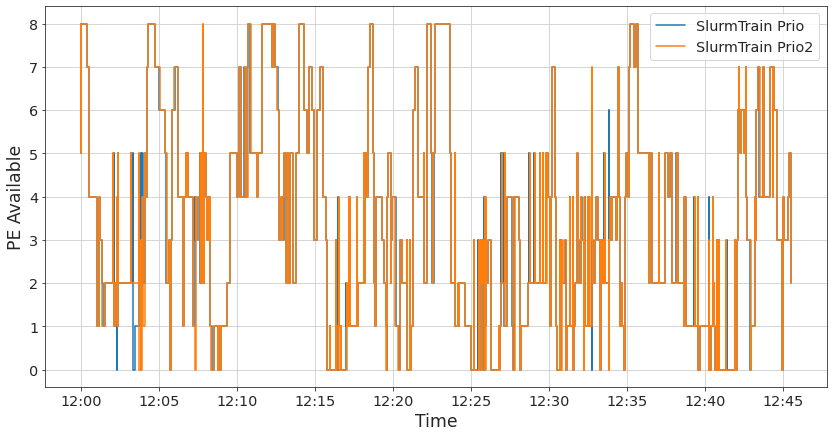

In [513]:
# Plot graph

fig, ax = plt.subplots(figsize=[14,7])

ax.xaxis.set_major_formatter(mdates.DateFormatter('%H:%M'))

## Plot 1

# ax = axs[0,0]

ax.step(st_prio_petime.event_time, 
        st_prio_petime.pe_avail,
        where='post',
        label = "SlurmTrain Prio")

ax.step(st_prio2_petime.event_time, 
        st_prio2_petime.pe_avail,
        where='post',
        label = "SlurmTrain Prio2")

ax.legend()
ax.set_xlabel('Time')
# ax.set_ylabel(r'PE Available / Max PE')
ax.set_ylabel('PE Available')

# # SAVE STUFF
# if save_data:
#     pltpath = f'{save_image_path}/{run_type}_{run_short}_{run_model}_pe_time_plot.png'
#     plt.savefig(pltpath, facecolor='w', transparent=False)

plt.show()

#### Jitter Plot

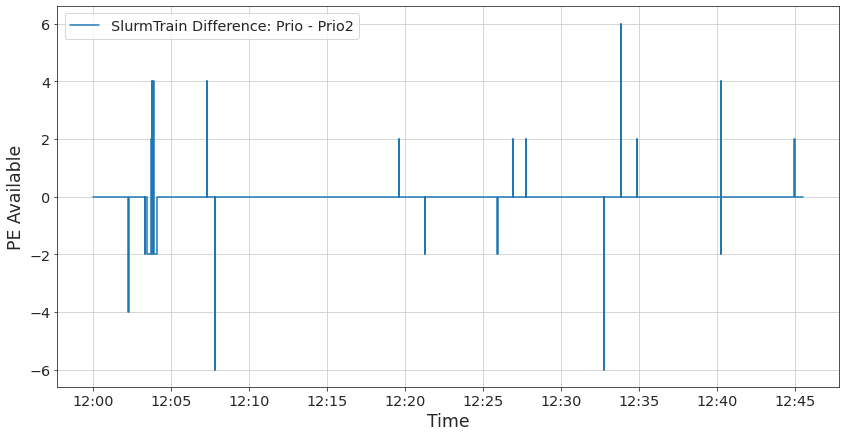

In [514]:
# Plot graph

fig, ax = plt.subplots(figsize=[14,7])

ax.xaxis.set_major_formatter(mdates.DateFormatter('%H:%M'))

## Plot 1

# ax = axs[0,0]

ax.step(st_prio_petime.event_time, 
        st_prio_petime.pe_avail - st_prio2_petime.pe_avail,
        where='post',
        label = "SlurmTrain Difference: Prio - Prio2")

ax.legend()
ax.set_xlabel('Time')
# ax.set_ylabel(r'PE Available / Max PE')
ax.set_ylabel('PE Available')

# # SAVE STUFF
# if save_data:
#     pltpath = f'{save_image_path}/{run_type}_{run_short}_{run_model}_pe_time_plot.png'
#     plt.savefig(pltpath, facecolor='w', transparent=False)

plt.show()

#### Multiple Jitter Plots

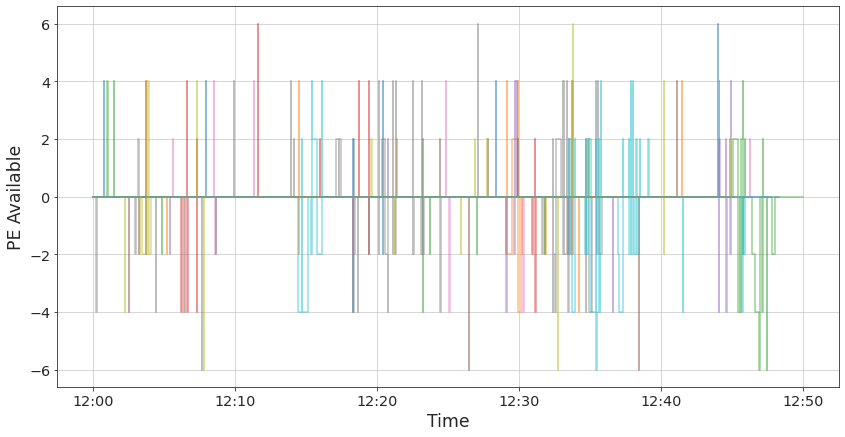

In [515]:
n = 200

fig, ax = plt.subplots(figsize=[14,7])
ax.xaxis.set_major_formatter(mdates.DateFormatter('%H:%M'))

runs=range(0,10)
# runs = [0]

for j in runs:
    st_prio_petime = dic_st_prio_petime[j]
    st_prio_petime['RunType'] = 'slurmtrain'
    st_prio_petime['SchedType'] = 'Priority'

    st_prio2_petime = dic_st_prio2_petime[j]
    st_prio2_petime['RunType'] = 'slurmtrain'
    st_prio2_petime['SchedType'] = 'Dynamic Priority'

    # Only show first n jobs
    st_prio_petime = st_prio_petime.loc[0:2*n].copy()
    st_prio2_petime = st_prio2_petime.loc[0:2*n].copy()
    
    # Plot
    ax.step(st_prio_petime.event_time, 
        st_prio_petime.pe_avail - st_prio2_petime.pe_avail,
        where='post',
        label = f"SlurmTrain Run {j+1} Difference: Prio - Prio2",
        alpha=.5)
    
# ax.legend()
ax.set_xlabel('Time')
# ax.set_ylabel(r'PE Available / Max PE')
ax.set_ylabel('PE Available')

plt.show()

### Other Graphs

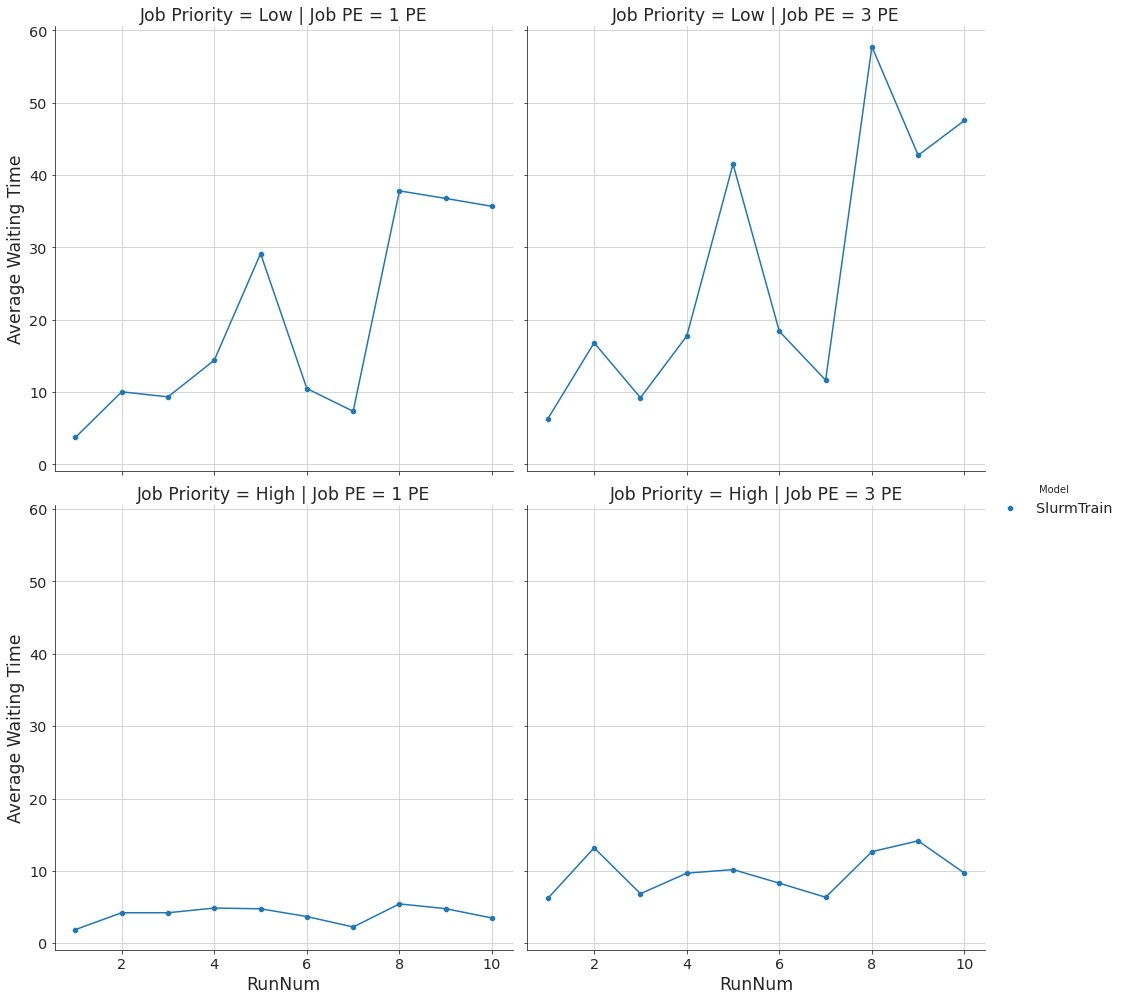

In [516]:
fg = sns.FacetGrid(df_plot_prio, 
                    hue = "Model",
                    row = "Job Priority",
                    col = "Job PE",
                    height = 7,
        
                  )

fg.map(sns.scatterplot, "RunNum", "wait_time_mean")
fg.map(sns.lineplot, "RunNum", "wait_time_mean")

fg.add_legend()

fg.set_ylabels("Average Waiting Time")

# myrun_models = "slurmtrain_simpe"
# pltpath = f'{save_image_path}/{myrun_shortname}_{myrun_models}.png'

# plt.savefig(pltpath, facecolor='w', transparent=False)

plt.show()

In [517]:
df_plot.query("RunNum == 10 and job_prio == 1 and Model == 'SlurmTrain'")

,job_prio,job_pe_req,wait_time_mean,run_time_mean,job_number_count,Total_run_backfills,RunNum,Model,SchedType,Job PE,Job Priority
0,1,1,35.664000,33.808000,125,0,10,SlurmTrain,Priority,1 PE,Low
1,1,3,47.537879,30.401515,132,0,10,SlurmTrain,Priority,3 PE,Low
0,1,1,30.984000,33.792000,125,0,10,SlurmTrain,Dynamic Priority,1 PE,Low
1,1,3,39.522727,30.325758,132,0,10,SlurmTrain,Dynamic Priority,3 PE,Low


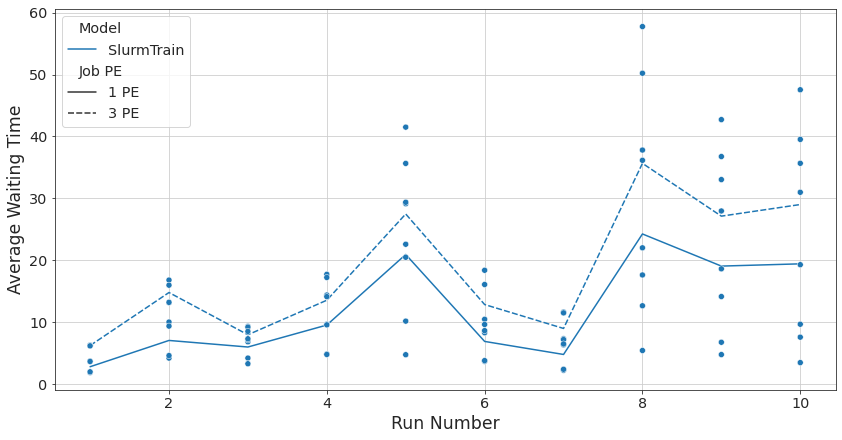

In [518]:
# Lets show this on one graph

fig, ax =plt.subplots(figsize=(14,7))

sns.set_style("ticks", {'axes.grid' : True})

p1 = sns.scatterplot(data=df_plot, 
                     x = "RunNum",
                     y = "wait_time_mean",
                     hue="Model",
                     ax = ax,
                     zorder = 10,
                     legend = None,
                     palette="tab10"
                     )

p2 = sns.lineplot(data=df_plot,
                  x = "RunNum",
                  y = "wait_time_mean",
                  hue = "Model",
                  style = "Job PE",
#                   style_order = (3,1),
                  ci = None,
                  palette="tab10",
                  ax = ax)

plt.xlabel("Run Number")
plt.ylabel("Average Waiting Time")

plt.show()

In [519]:
# TWO GRAPHS: 
# SLURMSIM VS SLURMTRAIN
# FIFO VS BF  -> wys backfills speed up 

In [520]:
# # No 8 version

# import matplotlib.pyplot as plt
# import seaborn as sns

# fig, ax =plt.subplots(figsize=(14,7))

# sns.set_style("ticks", {'axes.grid' : True})

# p1 = sns.scatterplot(data=df_plot_no8, 
#                      x = "RunNum",
#                      y = "wait_time_mean",
#                      hue="Model",
#                      ax = ax,
#                      zorder = 10,
#                      legend = None,
#                      palette="tab10"
#                      )

# p2 = sns.lineplot(data=df_plot_no8,
#                   x = "RunNum",
#                   y = "wait_time_mean",
#                   hue = "Model",
#                   style = "Job PE",
# #                   style_order = (3,1),
#                   ci = None,
#                   palette="tab10",
#                   ax = ax)

# plt.xlabel("Run Number")
# plt.ylabel("Average Waiting Time")

# plt.show()

In [521]:
# IDEA FOR FOLLOW UP GRAPH :  actual running times of jobs vs expected times ... 

#### Volgende probeerslae

In [522]:
# ?sns.catplot
# ?sns.relplot

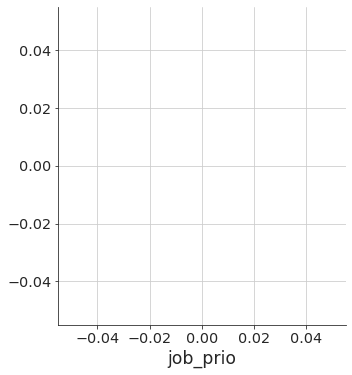

In [523]:
sns.relplot(data=df_plot, 
            x = "job_prio")

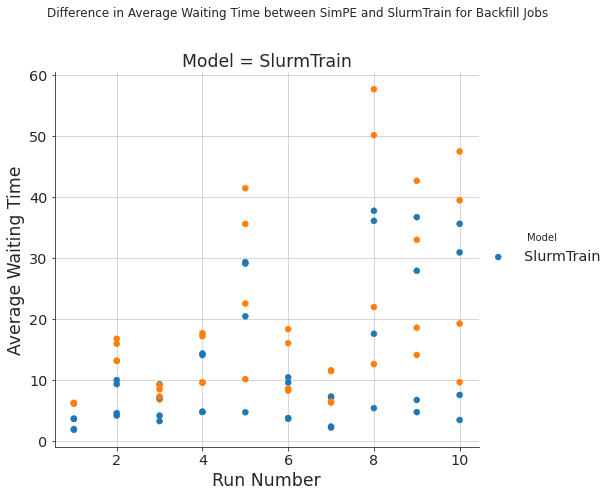

In [524]:
# Plot the wait times over the 10 runs

import matplotlib.pyplot as plt
import seaborn as sns

# Set a grid layout
sns.set_style("ticks", {'axes.grid' : True})

g = sns.FacetGrid(df_plot, 
                  col="Model", 
                  hue="Model", 
                  height=7, 
                  aspect=1, 
                  palette="tab10")

# # Draw line plot
# g.map(sns.lineplot, 
#       "RunNum", 
#       "wait_time_mean",
#       ci = None)

# Draw scatter plots (dot plots) with circle markers
g.map(sns.scatterplot, 
      "RunNum", 
      "wait_time_mean", 
      "Job PE",
      edgecolor=None, 
      marker="o")

# Add a legend
g.add_legend()

# Set plot title and labels
g.set_axis_labels("Run Number", "Average Waiting Time")
plt.subplots_adjust(top=0.85)
g.fig.suptitle('Difference in Average Waiting Time between SimPE and SlurmTrain for Backfill Jobs')

plt.show()

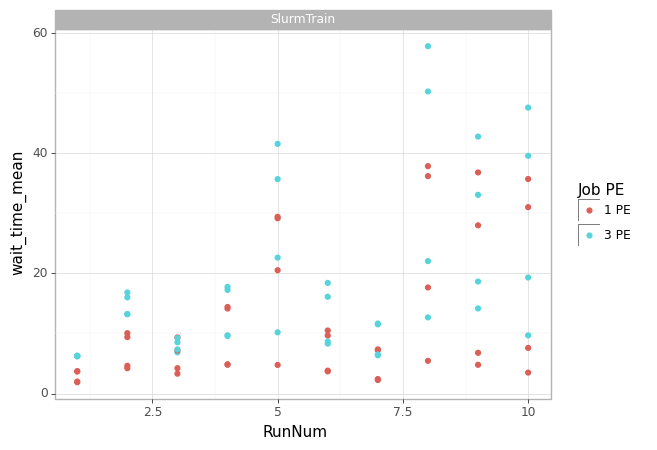

<ggplot: (-9223363249794023904)>

In [525]:
from plotnine import ggplot, aes, geom_point, geom_line, theme_light, facet_wrap

p = (
    ggplot(df_plot) +
    geom_point(aes("RunNum", "wait_time_mean", colour="Job PE")) + 
    theme_light() + 
    facet_wrap("Model")
)

p

In [526]:
# from plotnine import ggplot, geom_point, aes, stat_smooth, facet_wrap
# from plotnine.data import mtcars

# (ggplot(mtcars, aes("wt", "mpg", color="factor(gear)"))
#  + geom_point()
#  + stat_smooth(method="lm")
#  + facet_wrap("~gear"))

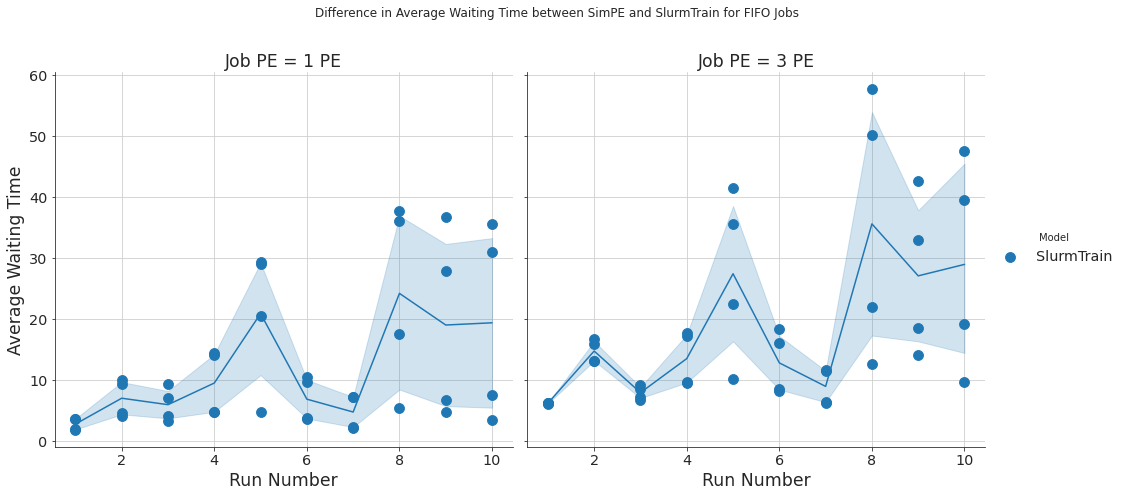

In [527]:
# Plot the wait times over the 10 runs

import matplotlib.pyplot as plt
import seaborn as sns

# Set a grid layout
sns.set_style("ticks", {'axes.grid' : True})

g = sns.FacetGrid(df_plot, 
                  col="Job PE", 
                  hue="Model", 
                  height=7, 
                  aspect=1, 
                  palette="tab10")

# Draw line plot
g.map(sns.lineplot, "RunNum", "wait_time_mean")

# Draw scatter plots (dot plots) with circle markers
g.map(sns.scatterplot, "RunNum", "wait_time_mean", 
      s=100, 
      edgecolor=None, 
      marker="o")

# Add a legend
g.add_legend()

# Set plot title and labels
g.set_axis_labels("Run Number", "Average Waiting Time")
plt.subplots_adjust(top=0.85)
g.fig.suptitle('Difference in Average Waiting Time between SimPE and SlurmTrain for FIFO Jobs')

plt.show()

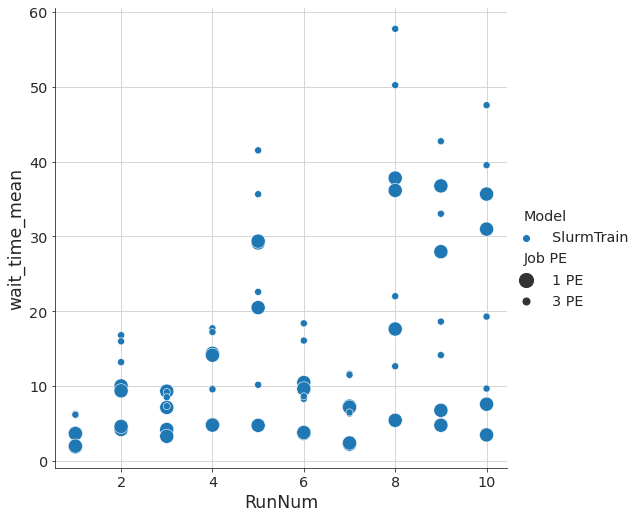

In [528]:
sns.relplot(data = df_plot,
            x="RunNum",
            y="wait_time_mean",
#              col = "Job PE",
            size = "Job PE",
            sizes = (50,200),
            hue="Model",
            height=7,
            aspect=1,
            kind = "scatter"
            )

plt.show()

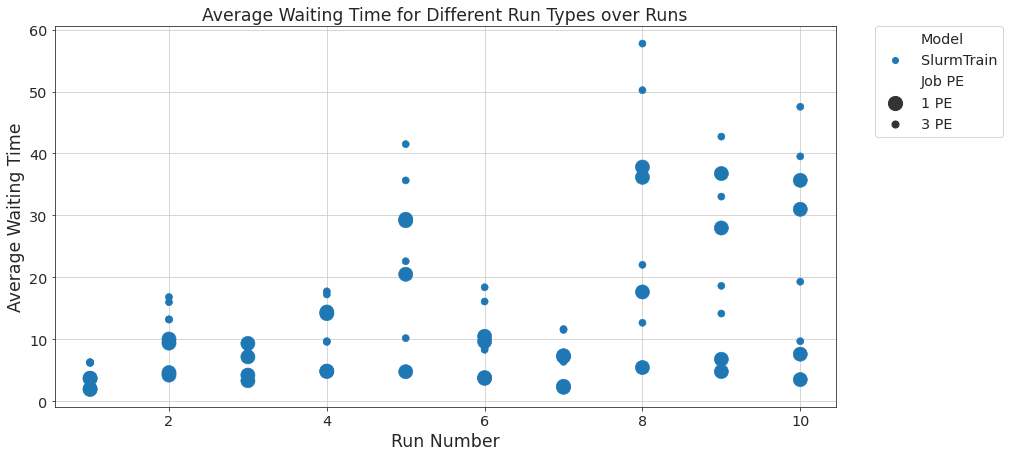

In [529]:
# Create a scatter plot
plt.figure(figsize=(14, 7))

sns.set_style("ticks", {'axes.grid' : True})
sns.scatterplot(x="RunNum", 
                y="wait_time_mean", 
                hue="Model", 
                size="Job PE", 
                sizes=(50, 200), 
                data=df_plot, 
                palette="tab10", 
                edgecolor=None, marker="o")

# Set plot title and labels
plt.title('Average Waiting Time for Different Run Types over Runs')
plt.xlabel('Run Number')
plt.ylabel('Average Waiting Time')

# Add a legend
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

plt.show()

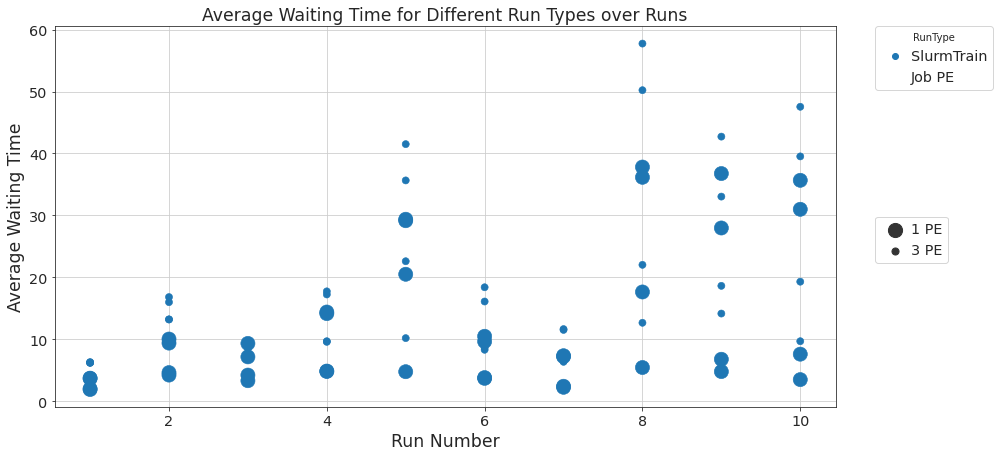

In [530]:
# Create a scatter plot
plt.figure(figsize=(14, 7))

scatter = sns.scatterplot(x="RunNum", 
                          y="wait_time_mean", 
                          hue="Model", 
                          size="Job PE", 
                          sizes=(50, 200), 
                          data=df_plot, 
                          palette="tab10", 
                          edgecolor=None, 
                          marker="o")

# Set plot title and labels
plt.title('Average Waiting Time for Different Run Types over Runs')
plt.xlabel('Run Number')
plt.ylabel('Average Waiting Time')

# Handle the legend: split it into two parts
handles, labels = scatter.get_legend_handles_labels()

# Show legend for RunType
legend1 = plt.legend(handles=handles[1:3], labels=labels[1:3], title="RunType", bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0., handletextpad=0.1)
plt.gca().add_artist(legend1)

# Show legend for job_pe_req
plt.legend(handles=handles[3:], labels=labels[3:], title="", bbox_to_anchor=(1.05, 0.5), loc=2, borderaxespad=0., handletextpad=0.1)

plt.show()

## Junk

In [531]:
# rng = np.random.default_rng()
# rng

In [532]:
# # T-test example

# rvs1 = stats.expon.rvs(loc=10,size=100,random_state=rng)
# rvs2 = (rvs1stats.expon.rvs(loc=10,size=100,random_state=rng)
#        )
#         # rvs1[1] = np.nan
# a = stats.ttest_rel(rvs1, rvs2)

# print(a.statistic)
# print(a.pvalue)

In [533]:
# rvs1

In [534]:
# rvs2

In [535]:
# %run ./srun8_slurmtrain.ipynb

## Step Graph with all the comments

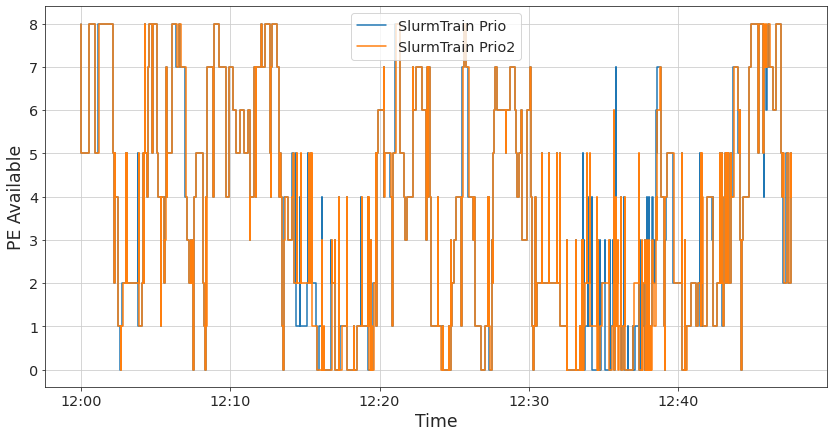

In [536]:
# Plot graph

fig, ax = plt.subplots(figsize=[14,7])

# for ax in axs.flat:
# #     ax.xaxis.set_minor_locator(mdates.AutoDateLocator(interval_multiples=True))
#     ax.xaxis.set_major_locator(mdates.AutoDateLocator(minticks=3, maxticks=4))
# #     ax.xaxis.set_minor_locator(mdates.HourLocator(byhour=range(11,19,1))) # Finetune! Or make more auto!
# #     ax.xaxis.set_major_locator(mdates.HourLocator(byhour=range(9,19,3))) # Finetune! Or make more auto!
#     ax.xaxis.set_major_formatter(mdates.DateFormatter('%y-%m-%d %H:%M'))

# ax.xaxis.set_major_locator(mdates.AutoDateLocator(minticks=3, maxticks=5))
# ax.xaxis.set_major_formatter(mdates.DateFormatter('%y-%m-%d %H:%M'))
# ax.xaxis.set_major_formatter(mdates.DateFormatter('%d %H:%M'))
ax.xaxis.set_major_formatter(mdates.DateFormatter('%H:%M'))

## Plot 1

# ax = axs[0,0]

ax.step(st_prio_petime.event_time, 
        st_prio_petime.pe_avail,
        where='post',
        label = "SlurmTrain Prio")

ax.step(st_prio2_petime.event_time, 
        st_prio2_petime.pe_avail,
        where='post',
        label = "SlurmTrain Prio2")

ax.legend()
ax.set_xlabel('Time')
# ax.set_ylabel(r'PE Available / Max PE')
ax.set_ylabel('PE Available')

# # SAVE STUFF
# if save_data:
#     pltpath = f'{save_image_path}/{run_type}_{run_short}_{run_model}_pe_time_plot.png'
#     plt.savefig(pltpath, facecolor='w', transparent=False)

plt.show()